In [ ]:
import xgboost as xgb
import sklearn
print("XGBoost version:", xgb.__version__)
print("Scikit-learn version:", sklearn.__version__)

XGBoost version: 2.1.4
Scikit-learn version: 1.6.1


In [ ]:
pip install xgboost==2.0.3 scikit-learn==1.3.2 numpy==1.26.4 --force-reinstall


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.9/61.9 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.1/297.1 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 135.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 112.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.7/307.7 kB 26.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.3/35.3 MB 64.0 MB/s eta 0:00:00
  Attempting uninstall: threadpoolctl
    Found existing installation: threadpoolctl 3.6.0
    Uninstalling threadpoolctl-3.6.0:
      Successfully uninstalled threadpoolctl-3.6.0
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: joblib
    Found existing installation: joblib 1.5.1
    Uninstalling joblib-1.5.1:
    

In [ ]:
import xgboost as xgb
import sklearn
import numpy

print("XGBoost version:", xgb.__version__)
print("Scikit-learn version:", sklearn.__version__)
print("Numpy version:", numpy.__version__)

XGBoost version: 2.0.3
Scikit-learn version: 1.3.2
Numpy version: 1.26.4


In [ ]:
import pandas as pd  # Load and manipulate data
import numpy as np  # Calculate mean and standard deviation
import xgboost as xgb  # XGBoost functionality
import matplotlib.pyplot as plt  # Plotting
from sklearn.model_selection import train_test_split  # Split datasets
from sklearn.metrics import (
    balanced_accuracy_score,
    roc_auc_score,
    make_scorer,
    confusion_matrix,  # Metrics
)
from sklearn.model_selection import GridSearchCV  # Grid search and cross-validation
from xgboost import XGBClassifier, plot_importance, plot_tree  # XGBoost utilities

In [ ]:
df_label = pd.read_csv('Patient_ID.csv', index_col="Patient_ID")
#df_label.set_index('Patient_ID')
df_label.head()

""
Patient_ID
PGDX16568P.singleFrag.bigWig
PGDX16569P.singleFrag.bigWig
PGDX16570P.singleFrag.bigWig
PGDX16580P.singleFrag.bigWig
PGDX16581P.singleFrag.bigWig


In [ ]:
# Convert Index Column to List
index_list = df_label.index.tolist()
print(index_list)


# col_list =  list(df_label["Patient_ID"])
# print(col_list)

['PGDX16568P.singleFrag.bigWig', 'PGDX16569P.singleFrag.bigWig', 'PGDX16570P.singleFrag.bigWig', 'PGDX16580P.singleFrag.bigWig', 'PGDX16581P.singleFrag.bigWig', 'PGDX16582P.singleFrag.bigWig', 'PGDX16584P.singleFrag.bigWig', 'PGDX16585P.singleFrag.bigWig', 'PGDX16586P.singleFrag.bigWig', 'PGDX16587P.singleFrag.bigWig', 'PGDX16588P.singleFrag.bigWig', 'PGDX16591P.singleFrag.bigWig', 'PGDX16592P.singleFrag.bigWig', 'PGDX16593P.singleFrag.bigWig', 'PGDX17942P.singleFrag.bigWig', 'PGDX17958P.singleFrag.bigWig', 'PGDX17960P.singleFrag.bigWig', 'PGDX17962P.singleFrag.bigWig', 'PGDX17963P.singleFrag.bigWig', 'PGDX17964P.singleFrag.bigWig', 'PGDX17966P.singleFrag.bigWig', 'PGDX17968P.singleFrag.bigWig', 'PGDX17970P.singleFrag.bigWig', 'PGDX17972P.singleFrag.bigWig', 'PGDX17974P.singleFrag.bigWig', 'PGDX17976P.singleFrag.bigWig', 'PGDX17982P.singleFrag.bigWig', 'PGDX17983P.singleFrag.bigWig', 'PGDX17984P.singleFrag.bigWig', 'PGDX17986P.singleFrag.bigWig', 'PGDX17987P.singleFrag.bigWig', 'PGDX17

In [ ]:
#Import the "Reference_ID.csv" file which contain Referance_ID, Chromosome_Name, Begins,Ends and Fragment_Length.
#Create new Dataframe
df_ID = pd.read_csv('PC2_Model_PANC1_CD4+_Merged_RemOverlaps_28659_Unique_Peaks.csv')
df_ID.head()

,Referance_ID,Chromosome_Name,Begins,Ends,Fragment_Length
0,chr1:5351-15351,chr1,5351,15351,10000
1,chr1:561813-571813,chr1,561813,571813,10000
2,chr1:709113-719113,chr1,709113,719113,10000
3,chr1:721301-731301,chr1,721301,731301,10000
4,chr1:747751-757751,chr1,747751,757751,10000


In [ ]:
from numpy import load

#load "results.npz" to a object with the name "data"
data = load('results_PancreaticCancer_10kb_PANC1_CD4+_Merged_RemOverlap_28659_Peaks.npz')

#List out and print all the variables and their content within the "data" object
lst = data.files
for item in lst:
    print(item)
    print(data[item])

matrix
[[  4.62649024   4.34093881   4.18647438 ...   3.6869673    3.07895954
    5.49738804]
 [  4.09052847   3.6778522    4.1696131  ...   3.18636738   3.14920027
    5.59592969]
 [  4.56005147   4.57396936   3.98538677 ...   4.75819015   3.21499946
    4.68295693]
 ...
 [ 75.80335758 590.76305616  79.02218556 ... 165.98216007 125.16653356
  145.34531758]
 [ 75.84837684 591.56815924  79.87594773 ... 161.62188563 126.13761848
  144.6581001 ]
 [ 76.07017312 592.28327535  80.24970308 ... 162.84210694 126.58922252
  146.04055156]]
labels
['PGDX16568P.singleFrag.bigWig' 'PGDX16569P.singleFrag.bigWig'
 'PGDX16570P.singleFrag.bigWig' 'PGDX16580P.singleFrag.bigWig'
 'PGDX16581P.singleFrag.bigWig' 'PGDX16582P.singleFrag.bigWig'
 'PGDX16584P.singleFrag.bigWig' 'PGDX16585P.singleFrag.bigWig'
 'PGDX16586P.singleFrag.bigWig' 'PGDX16587P.singleFrag.bigWig'
 'PGDX16588P.singleFrag.bigWig' 'PGDX16591P.singleFrag.bigWig'
 'PGDX16592P.singleFrag.bigWig' 'PGDX16593P.singleFrag.bigWig'
 'PGDX17942P.sing

In [ ]:
#Print the list of variables in "data" object
print(lst)

['matrix', 'labels']


In [ ]:
#Add data in to two separate variables
# array_1 = data['labels'] #Array_1 contain label information

array_1 = index_list #Array_1 contain label information taken from "df_label" dataframe index column and stored in "index_list" variable.
array_2 = data['matrix'] #Array_2 contain "matrix" variable information stored in "data" object.

In [ ]:
print(array_1)

['PGDX16568P.singleFrag.bigWig', 'PGDX16569P.singleFrag.bigWig', 'PGDX16570P.singleFrag.bigWig', 'PGDX16580P.singleFrag.bigWig', 'PGDX16581P.singleFrag.bigWig', 'PGDX16582P.singleFrag.bigWig', 'PGDX16584P.singleFrag.bigWig', 'PGDX16585P.singleFrag.bigWig', 'PGDX16586P.singleFrag.bigWig', 'PGDX16587P.singleFrag.bigWig', 'PGDX16588P.singleFrag.bigWig', 'PGDX16591P.singleFrag.bigWig', 'PGDX16592P.singleFrag.bigWig', 'PGDX16593P.singleFrag.bigWig', 'PGDX17942P.singleFrag.bigWig', 'PGDX17958P.singleFrag.bigWig', 'PGDX17960P.singleFrag.bigWig', 'PGDX17962P.singleFrag.bigWig', 'PGDX17963P.singleFrag.bigWig', 'PGDX17964P.singleFrag.bigWig', 'PGDX17966P.singleFrag.bigWig', 'PGDX17968P.singleFrag.bigWig', 'PGDX17970P.singleFrag.bigWig', 'PGDX17972P.singleFrag.bigWig', 'PGDX17974P.singleFrag.bigWig', 'PGDX17976P.singleFrag.bigWig', 'PGDX17982P.singleFrag.bigWig', 'PGDX17983P.singleFrag.bigWig', 'PGDX17984P.singleFrag.bigWig', 'PGDX17986P.singleFrag.bigWig', 'PGDX17987P.singleFrag.bigWig', 'PGDX17

In [ ]:
print(array_2)

[[  4.62649024   4.34093881   4.18647438 ...   3.6869673    3.07895954
    5.49738804]
 [  4.09052847   3.6778522    4.1696131  ...   3.18636738   3.14920027
    5.59592969]
 [  4.56005147   4.57396936   3.98538677 ...   4.75819015   3.21499946
    4.68295693]
 ...
 [ 75.80335758 590.76305616  79.02218556 ... 165.98216007 125.16653356
  145.34531758]
 [ 75.84837684 591.56815924  79.87594773 ... 161.62188563 126.13761848
  144.6581001 ]
 [ 76.07017312 592.28327535  80.24970308 ... 162.84210694 126.58922252
  146.04055156]]


In [ ]:
#Add "data" object "array_2" to a pandas dataframe.
#column_names = ['column 1', 'column 2', 'column 3']

column_names = array_1
df_Original = pd.DataFrame(array_2, columns=column_names)
print(df_Original)

       PGDX16568P.singleFrag.bigWig  PGDX16569P.singleFrag.bigWig  \
0                          4.626490                      4.340939   
1                          4.090528                      3.677852   
2                          4.560051                      4.573969   
3                          4.949609                      4.664147   
4                          3.471570                      3.503103   
...                             ...                           ...   
28654                     75.804181                    588.539751   
28655                     76.507180                    591.716418   
28656                     75.803358                    590.763056   
28657                     75.848377                    591.568159   
28658                     76.070173                    592.283275   

       PGDX16570P.singleFrag.bigWig  PGDX16580P.singleFrag.bigWig  \
0                          4.186474                      4.916980   
1                          4.1696

In [ ]:
#To save the dataframe to .CSV file
df_Original.to_csv('MODEL_PC2_Original.csv', index=False)

In [ ]:
#Join(Concatanate) "df_ID" dataframe with "df_Original" dataframe.
df_1 = pd.concat([df_ID, df_Original], axis=1)
df_1.head()

,Referance_ID,Chromosome_Name,Begins,Ends,Fragment_Length,PGDX16568P.singleFrag.bigWig,PGDX16569P.singleFrag.bigWig,PGDX16570P.singleFrag.bigWig,PGDX16580P.singleFrag.bigWig,PGDX16581P.singleFrag.bigWig,...,PGDX17751P.singleFrag.bigWig,PGDX17752P.singleFrag.bigWig,PGDX17753P.singleFrag.bigWig,PGDX17754P.singleFrag.bigWig,PGDX17755P.singleFrag.bigWig,PGDX17756P.singleFrag.bigWig,PGDX17760P.singleFrag.bigWig,PGDX17761P.singleFrag.bigWig,PGDX17762P.singleFrag.bigWig,PGDX17763P.singleFrag.bigWig
0,chr1:5351-15351,chr1,5351,15351,10000,4.626490,4.340939,4.186474,4.916980,3.885485,...,2.766720,2.147767,2.071532,3.080506,3.681816,3.339914,3.462031,3.686967,3.078960,5.497388
1,chr1:561813-571813,chr1,561813,571813,10000,4.090528,3.677852,4.169613,4.914091,3.523880,...,2.478166,2.154259,2.269471,2.814601,3.144370,3.440186,3.456157,3.186367,3.149200,5.595930
2,chr1:709113-719113,chr1,709113,719113,10000,4.560051,4.573969,3.985387,5.519875,3.442578,...,2.583923,2.288125,2.026788,3.060587,3.810971,3.496727,3.488044,4.758190,3.214999,4.682957
3,chr1:721301-731301,chr1,721301,731301,10000,4.949609,4.664147,3.571245,4.591019,3.226920,...,2.620838,2.073517,1.890214,2.856892,3.731339,2.997633,3.429537,5.253299,3.260502,5.308277
4,chr1:747751-757751,chr1,747751,757751,10000,3.471570,3.503103,2.662397,4.136137,2.749720,...,2.054489,1.893636,1.958659,2.325015,2.833207,2.227308,2.505468,4.327280,4.288345,3.355537


In [ ]:
#Displaying the names of the columns.
print(df_1.columns)

Index(['Referance_ID', 'Chromosome_Name', 'Begins', 'Ends', 'Fragment_Length',
       'PGDX16568P.singleFrag.bigWig', 'PGDX16569P.singleFrag.bigWig',
       'PGDX16570P.singleFrag.bigWig', 'PGDX16580P.singleFrag.bigWig',
       'PGDX16581P.singleFrag.bigWig', 'PGDX16582P.singleFrag.bigWig',
       'PGDX16584P.singleFrag.bigWig', 'PGDX16585P.singleFrag.bigWig',
       'PGDX16586P.singleFrag.bigWig', 'PGDX16587P.singleFrag.bigWig',
       'PGDX16588P.singleFrag.bigWig', 'PGDX16591P.singleFrag.bigWig',
       'PGDX16592P.singleFrag.bigWig', 'PGDX16593P.singleFrag.bigWig',
       'PGDX17942P.singleFrag.bigWig', 'PGDX17958P.singleFrag.bigWig',
       'PGDX17960P.singleFrag.bigWig', 'PGDX17962P.singleFrag.bigWig',
       'PGDX17963P.singleFrag.bigWig', 'PGDX17964P.singleFrag.bigWig',
       'PGDX17966P.singleFrag.bigWig', 'PGDX17968P.singleFrag.bigWig',
       'PGDX17970P.singleFrag.bigWig', 'PGDX17972P.singleFrag.bigWig',
       'PGDX17974P.singleFrag.bigWig', 'PGDX17976P.singleFrag.bigWig'

In [ ]:
#Displaying the shape of the dataset.
print(df_1.shape)

(28659, 89)


In [ ]:
#Drop rows containg "Chr Y" information
df_1.drop(df_1.loc[df_1['Chromosome_Name']=='chrY'].index, inplace=True)
#df_1.drop(df_1.loc[df_1['Chromosome_Name']=='chrX'].index, inplace=True)

In [ ]:
#Drop rows containg "ChrM", "Random Chr", "Unmapped Chr". This code will keep all rows in df_1 where the 'Chromosome_Name' does NOT contain any of the specified keywords.

keywords = ["chrUn", "chrM", "random"]
df_1 = df_1[~df_1['Chromosome_Name'].str.contains('|'.join(keywords))]

In [ ]:
#Displaying the shape of the dataset.
print(df_1.shape)

(28545, 89)


In [ ]:
#set axis=0 to remove rows, axis = 1 to remove colums.
#Inplace=True will save the changers in to the df dataframe directly without making a copy.
#df_1.columns = df_1.columns.str.replace(' ','_')

#To drop columns
df_1.drop(['Chromosome_Name','Begins','Ends','Fragment_Length'],axis=1, inplace=True)
df_1.head()

,Referance_ID,PGDX16568P.singleFrag.bigWig,PGDX16569P.singleFrag.bigWig,PGDX16570P.singleFrag.bigWig,PGDX16580P.singleFrag.bigWig,PGDX16581P.singleFrag.bigWig,PGDX16582P.singleFrag.bigWig,PGDX16584P.singleFrag.bigWig,PGDX16585P.singleFrag.bigWig,PGDX16586P.singleFrag.bigWig,...,PGDX17751P.singleFrag.bigWig,PGDX17752P.singleFrag.bigWig,PGDX17753P.singleFrag.bigWig,PGDX17754P.singleFrag.bigWig,PGDX17755P.singleFrag.bigWig,PGDX17756P.singleFrag.bigWig,PGDX17760P.singleFrag.bigWig,PGDX17761P.singleFrag.bigWig,PGDX17762P.singleFrag.bigWig,PGDX17763P.singleFrag.bigWig
0,chr1:5351-15351,4.626490,4.340939,4.186474,4.916980,3.885485,4.944528,5.087499,2.227890,4.244488,...,2.766720,2.147767,2.071532,3.080506,3.681816,3.339914,3.462031,3.686967,3.078960,5.497388
1,chr1:561813-571813,4.090528,3.677852,4.169613,4.914091,3.523880,4.569825,4.695097,2.121156,3.309134,...,2.478166,2.154259,2.269471,2.814601,3.144370,3.440186,3.456157,3.186367,3.149200,5.595930
2,chr1:709113-719113,4.560051,4.573969,3.985387,5.519875,3.442578,4.881268,4.795984,2.339782,4.009010,...,2.583923,2.288125,2.026788,3.060587,3.810971,3.496727,3.488044,4.758190,3.214999,4.682957
3,chr1:721301-731301,4.949609,4.664147,3.571245,4.591019,3.226920,4.353270,5.037908,2.128381,3.703943,...,2.620838,2.073517,1.890214,2.856892,3.731339,2.997633,3.429537,5.253299,3.260502,5.308277
4,chr1:747751-757751,3.471570,3.503103,2.662397,4.136137,2.749720,2.756707,3.262140,1.750152,2.609407,...,2.054489,1.893636,1.958659,2.325015,2.833207,2.227308,2.505468,4.327280,4.288345,3.355537


In [ ]:
#To get the data types
df_1.dtypes

,0
Referance_ID,object
PGDX16568P.singleFrag.bigWig,float64
PGDX16569P.singleFrag.bigWig,float64
PGDX16570P.singleFrag.bigWig,float64
PGDX16580P.singleFrag.bigWig,float64
...,...
PGDX17756P.singleFrag.bigWig,float64
PGDX17760P.singleFrag.bigWig,float64
PGDX17761P.singleFrag.bigWig,float64
PGDX17762P.singleFrag.bigWig,float64


In [ ]:
#To transpose the data set (Rows to columns and columns to rows)
#df = df.transpose()  => Will only transpose data but it will not set the "Referance_ID" as column names


#Transpose Data Frame & Set First Column as Header
#To transpose data and set the "Referance_Id" as column names.
df_2 = df_1.set_index('Referance_ID').T
df_2.head()

Referance_ID,chr1:5351-15351,chr1:561813-571813,chr1:709113-719113,chr1:721301-731301,chr1:747751-757751,chr1:757902-767902,chr1:800238-810238,chr1:820113-830113,chr1:834551-844551,chr1:844551-854551,...,chrX:154028838-154038838,chrX:154204188-154214188,chrX:154249255-154259255,chrX:154280838-154290838,chrX:154294863-154304863,chrX:154412238-154422238,chrX:154439801-154449801,chrX:154488626-154498626,chrX:154837413-154847413,chrX:154857363-154867363
PGDX16568P.singleFrag.bigWig,4.626490,4.090528,4.560051,4.949609,3.471570,4.195120,5.143714,6.010607,5.749672,4.495145,...,62.180794,62.488608,62.224810,62.190427,62.879485,62.948131,63.649413,63.100228,62.925299,62.449652
PGDX16569P.singleFrag.bigWig,4.340939,3.677852,4.573969,4.664147,3.503103,3.246304,4.226482,6.402308,8.811705,8.535679,...,507.937629,507.952864,507.651459,507.540506,506.471809,506.936019,507.668947,507.984459,507.413295,507.296188
PGDX16570P.singleFrag.bigWig,4.186474,4.169613,3.985387,3.571245,2.662397,2.795684,4.361523,4.507181,4.641914,3.610464,...,63.891185,63.087802,63.445548,63.281774,62.638685,62.790439,63.442786,62.993301,62.840774,62.258765
PGDX16580P.singleFrag.bigWig,4.916980,4.914091,5.519875,4.591019,4.136137,6.328119,9.892538,9.937811,9.943375,8.592715,...,92.821203,93.104603,92.605272,92.323893,92.018772,91.865269,92.876176,92.037084,92.706338,91.687398
PGDX16581P.singleFrag.bigWig,3.885485,3.523880,3.442578,3.226920,2.749720,2.664045,4.410872,4.553807,3.998923,3.163975,...,70.347540,70.338103,70.522145,69.913610,69.483230,70.395854,71.270418,70.991425,69.619020,69.243301


In [ ]:
#To get the data types
df_2.dtypes

,0
Referance_ID,
chr1:5351-15351,float64
chr1:561813-571813,float64
chr1:709113-719113,float64
chr1:721301-731301,float64
chr1:747751-757751,float64
...,...
chrX:154412238-154422238,float64
chrX:154439801-154449801,float64
chrX:154488626-154498626,float64


In [ ]:
#To save the transposed data set
df_2.to_csv('MODEL_PC2_Transposed.csv', index= False)
#If you add "index" as "False", it will move the Patient ID to row names. If you name the index "True" it will add patient Id the 1st column.

In [ ]:
#List the row names of df_2 dataframe
list(df_2.index.values)

['PGDX16568P.singleFrag.bigWig',
 'PGDX16569P.singleFrag.bigWig',
 'PGDX16570P.singleFrag.bigWig',
 'PGDX16580P.singleFrag.bigWig',
 'PGDX16581P.singleFrag.bigWig',
 'PGDX16582P.singleFrag.bigWig',
 'PGDX16584P.singleFrag.bigWig',
 'PGDX16585P.singleFrag.bigWig',
 'PGDX16586P.singleFrag.bigWig',
 'PGDX16587P.singleFrag.bigWig',
 'PGDX16588P.singleFrag.bigWig',
 'PGDX16591P.singleFrag.bigWig',
 'PGDX16592P.singleFrag.bigWig',
 'PGDX16593P.singleFrag.bigWig',
 'PGDX17942P.singleFrag.bigWig',
 'PGDX17958P.singleFrag.bigWig',
 'PGDX17960P.singleFrag.bigWig',
 'PGDX17962P.singleFrag.bigWig',
 'PGDX17963P.singleFrag.bigWig',
 'PGDX17964P.singleFrag.bigWig',
 'PGDX17966P.singleFrag.bigWig',
 'PGDX17968P.singleFrag.bigWig',
 'PGDX17970P.singleFrag.bigWig',
 'PGDX17972P.singleFrag.bigWig',
 'PGDX17974P.singleFrag.bigWig',
 'PGDX17976P.singleFrag.bigWig',
 'PGDX17982P.singleFrag.bigWig',
 'PGDX17983P.singleFrag.bigWig',
 'PGDX17984P.singleFrag.bigWig',
 'PGDX17986P.singleFrag.bigWig',
 'PGDX1798

In [ ]:
#Import .csv file "Cancer_TorF.csv" as the new dataframe(df_Cancer_TorF) which has the column "Cancer" and data values "T" or "F".
#Set 1st column as the row name by "index_col=0".
df_Cancer_TorF = pd.read_csv('Cancer_TorF.csv', index_col=0)
df_Cancer_TorF.head()

,Cancer
Patient_ID,
PGDX16568P.singleFrag.bigWig,F
PGDX16569P.singleFrag.bigWig,F
PGDX16570P.singleFrag.bigWig,F
PGDX16580P.singleFrag.bigWig,F
PGDX16581P.singleFrag.bigWig,F


In [ ]:
#Get the shape of the "df_Cancer_TorF" dataframe
df_Cancer_TorF.shape

(84, 1)

In [ ]:
#Give df_2 as the first dataframe to merge and df_1 as the second datframe to merge. This will bring "Cancer" column as the 1st column in new datframe df_3
#Join "df_Cancer_TorF" and "df_2" dataframes using concatenate funchion
df_3 = pd.concat([df_Cancer_TorF, df_2], axis=1)
df_3.head()

,Cancer,chr1:5351-15351,chr1:561813-571813,chr1:709113-719113,chr1:721301-731301,chr1:747751-757751,chr1:757902-767902,chr1:800238-810238,chr1:820113-830113,chr1:834551-844551,...,chrX:154028838-154038838,chrX:154204188-154214188,chrX:154249255-154259255,chrX:154280838-154290838,chrX:154294863-154304863,chrX:154412238-154422238,chrX:154439801-154449801,chrX:154488626-154498626,chrX:154837413-154847413,chrX:154857363-154867363
PGDX16568P.singleFrag.bigWig,F,4.626490,4.090528,4.560051,4.949609,3.471570,4.195120,5.143714,6.010607,5.749672,...,62.180794,62.488608,62.224810,62.190427,62.879485,62.948131,63.649413,63.100228,62.925299,62.449652
PGDX16569P.singleFrag.bigWig,F,4.340939,3.677852,4.573969,4.664147,3.503103,3.246304,4.226482,6.402308,8.811705,...,507.937629,507.952864,507.651459,507.540506,506.471809,506.936019,507.668947,507.984459,507.413295,507.296188
PGDX16570P.singleFrag.bigWig,F,4.186474,4.169613,3.985387,3.571245,2.662397,2.795684,4.361523,4.507181,4.641914,...,63.891185,63.087802,63.445548,63.281774,62.638685,62.790439,63.442786,62.993301,62.840774,62.258765
PGDX16580P.singleFrag.bigWig,F,4.916980,4.914091,5.519875,4.591019,4.136137,6.328119,9.892538,9.937811,9.943375,...,92.821203,93.104603,92.605272,92.323893,92.018772,91.865269,92.876176,92.037084,92.706338,91.687398
PGDX16581P.singleFrag.bigWig,F,3.885485,3.523880,3.442578,3.226920,2.749720,2.664045,4.410872,4.553807,3.998923,...,70.347540,70.338103,70.522145,69.913610,69.483230,70.395854,71.270418,70.991425,69.619020,69.243301


In [ ]:
# # Remove a specific sample from the final analysis using its index label. This will Drop a row that contain the sample data.
# df_3 = df_3.drop('EE86276.hg19.coverage.mapq30.bw')

# # Remove multiple rows
# #df_3 = df_3.drop(['EE86276.hg19.coverage.mapq30.bw', 'EE85988.hg19.coverage.mapq30.bw'])

In [ ]:
#Get the shape of the "df_Cancer_TorF" dataframe
df_3.shape

(84, 28546)

In [ ]:
#Replace output column "Cancer" with T=1 and F=0
df_3['Cancer'] = df_3['Cancer'].str.replace('T','1')
df_3['Cancer'] = df_3['Cancer'].str.replace('F','0')
df_3.head()

,Cancer,chr1:5351-15351,chr1:561813-571813,chr1:709113-719113,chr1:721301-731301,chr1:747751-757751,chr1:757902-767902,chr1:800238-810238,chr1:820113-830113,chr1:834551-844551,...,chrX:154028838-154038838,chrX:154204188-154214188,chrX:154249255-154259255,chrX:154280838-154290838,chrX:154294863-154304863,chrX:154412238-154422238,chrX:154439801-154449801,chrX:154488626-154498626,chrX:154837413-154847413,chrX:154857363-154867363
PGDX16568P.singleFrag.bigWig,0,4.626490,4.090528,4.560051,4.949609,3.471570,4.195120,5.143714,6.010607,5.749672,...,62.180794,62.488608,62.224810,62.190427,62.879485,62.948131,63.649413,63.100228,62.925299,62.449652
PGDX16569P.singleFrag.bigWig,0,4.340939,3.677852,4.573969,4.664147,3.503103,3.246304,4.226482,6.402308,8.811705,...,507.937629,507.952864,507.651459,507.540506,506.471809,506.936019,507.668947,507.984459,507.413295,507.296188
PGDX16570P.singleFrag.bigWig,0,4.186474,4.169613,3.985387,3.571245,2.662397,2.795684,4.361523,4.507181,4.641914,...,63.891185,63.087802,63.445548,63.281774,62.638685,62.790439,63.442786,62.993301,62.840774,62.258765
PGDX16580P.singleFrag.bigWig,0,4.916980,4.914091,5.519875,4.591019,4.136137,6.328119,9.892538,9.937811,9.943375,...,92.821203,93.104603,92.605272,92.323893,92.018772,91.865269,92.876176,92.037084,92.706338,91.687398
PGDX16581P.singleFrag.bigWig,0,3.885485,3.523880,3.442578,3.226920,2.749720,2.664045,4.410872,4.553807,3.998923,...,70.347540,70.338103,70.522145,69.913610,69.483230,70.395854,71.270418,70.991425,69.619020,69.243301


In [ ]:
#To convert "Cancer" Column data in to numeric variable
#To get the data types
df_3['Cancer'] = pd.to_numeric(df_3['Cancer'])
df_3.dtypes

,0
Cancer,int64
chr1:5351-15351,float64
chr1:561813-571813,float64
chr1:709113-719113,float64
chr1:721301-731301,float64
...,...
chrX:154412238-154422238,float64
chrX:154439801-154449801,float64
chrX:154488626-154498626,float64
chrX:154837413-154847413,float64


In [ ]:
#Save the Final Dataframe (df_3) as a backup.
df_3.to_csv('MODEL_PC2_Final.csv', index= False)

In [ ]:
# import pandas as pd  #load and manipulate data for one-hot Encoding
# import numpy as np    #calculate the mean and standard deviation
# import xgboost as xgb #XGBoost stuff
# import matplotlib.pyplot as plt
# from sklearn.model_selection import train_test_split  #split data in to training and testing sets.
# from sklearn.metrics import balanced_accuracy_score, roc_auc_score, make_scorer #for scoring
# from sklearn.model_selection import GridSearchCV #cross validation
# from sklearn.metrics import confusion_matrix  #creates a confution matrix
# from matplotlib import pyplot
# from xgboost import plot_importance
# from xgboost import XGBClassifier, plot_importance, plot_tree

In [ ]:
# #Skip This step if your running it from the begining. If your loading the "Orion_Final.csv" file later, Run this step.

# #Load the Final .csv file
# df_3 = pd.read_csv('Orion_MODEL_2804_Significant_DESeq_Final.csv')
# df_3.head()

In [ ]:
#Formating data set to 'X' variable. As for the convention use capital "X" for independent variables.
X = df_3.drop('Cancer',axis=1).copy()
X.head()

,chr1:5351-15351,chr1:561813-571813,chr1:709113-719113,chr1:721301-731301,chr1:747751-757751,chr1:757902-767902,chr1:800238-810238,chr1:820113-830113,chr1:834551-844551,chr1:844551-854551,...,chrX:154028838-154038838,chrX:154204188-154214188,chrX:154249255-154259255,chrX:154280838-154290838,chrX:154294863-154304863,chrX:154412238-154422238,chrX:154439801-154449801,chrX:154488626-154498626,chrX:154837413-154847413,chrX:154857363-154867363
PGDX16568P.singleFrag.bigWig,4.626490,4.090528,4.560051,4.949609,3.471570,4.195120,5.143714,6.010607,5.749672,4.495145,...,62.180794,62.488608,62.224810,62.190427,62.879485,62.948131,63.649413,63.100228,62.925299,62.449652
PGDX16569P.singleFrag.bigWig,4.340939,3.677852,4.573969,4.664147,3.503103,3.246304,4.226482,6.402308,8.811705,8.535679,...,507.937629,507.952864,507.651459,507.540506,506.471809,506.936019,507.668947,507.984459,507.413295,507.296188
PGDX16570P.singleFrag.bigWig,4.186474,4.169613,3.985387,3.571245,2.662397,2.795684,4.361523,4.507181,4.641914,3.610464,...,63.891185,63.087802,63.445548,63.281774,62.638685,62.790439,63.442786,62.993301,62.840774,62.258765
PGDX16580P.singleFrag.bigWig,4.916980,4.914091,5.519875,4.591019,4.136137,6.328119,9.892538,9.937811,9.943375,8.592715,...,92.821203,93.104603,92.605272,92.323893,92.018772,91.865269,92.876176,92.037084,92.706338,91.687398
PGDX16581P.singleFrag.bigWig,3.885485,3.523880,3.442578,3.226920,2.749720,2.664045,4.410872,4.553807,3.998923,3.163975,...,70.347540,70.338103,70.522145,69.913610,69.483230,70.395854,71.270418,70.991425,69.619020,69.243301


In [ ]:
#Formating data set to 'y' variable. As for the convention use simple "y" for predicter variables.
y = df_3['Cancer'].copy()
y.head()

,Cancer
PGDX16568P.singleFrag.bigWig,0
PGDX16569P.singleFrag.bigWig,0
PGDX16570P.singleFrag.bigWig,0
PGDX16580P.singleFrag.bigWig,0
PGDX16581P.singleFrag.bigWig,0


In [ ]:
#To veryfy that 'y' only contain 1s and 0s
y.unique()

array([0, 1])

In [ ]:
# "y" sample counts
y.value_counts()

,count
Cancer,
0,50
1,34


In [ ]:
#To see what percentage of people have Cancer in the dataset.
#Here since "y" contain numbers (1 and 0), the sum function will calculate the number of cancer patients and len function will calculate the total rows.
#Dividing number of patients by total number of rows will give you total number of patients as a percentage.
sum(y)/len(y)

0.40476190476190477

In [ ]:
#Spliting datasets in to four variables (X_train, X_test, y_train, y_test)
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42,train_size = 0.7, stratify=y)

In [ ]:
# "y_train" sample counts
y_train.value_counts()

,count
Cancer,
0,35
1,23


In [ ]:
# "y_test" sample counts
y_test.value_counts()

,count
Cancer,
0,15
1,11


In [ ]:
#So both 'X' and 'y' variables are previously split in to 4 groups.
#For 'X' => X_train and X_test.
#For 'y' => y_train and y_test.

#To verify that using stratify worked as expected in "y_train" must have a values closer to original Cancer percentage.
sum(y_train)/len(y_train)

0.39655172413793105

In [ ]:
#To verify that using stratify worked as expected in "y_test" must also have a value closer to original Cancer percentage
sum(y_test)/len(y_test)

0.4230769230769231

In [ ]:
# Finding the best value for scaling the weights (Scale_pos_weight)
# y.value_counts()
# y_train.value_counts()

# This parameter shows the data imbalance in the training set (Cancer and healthy)

scale_pos_weight = y_train[y_train==0].count() / y_train[y_train==1].count()
print(scale_pos_weight)


1.5217391304347827


In [ ]:
# Check for duplicate column names in X variable
duplicate_columns = X_train.columns[X_train.columns.duplicated()]
if not duplicate_columns.empty:
    print("Duplicate column names:", duplicate_columns)

In [ ]:
#XGBoost Default Parameters
clf_xgb = xgb.XGBClassifier(seed=42,
                            early_stopping_rounds=10,
                            eval_metric='aucpr',
                            base_score=0.5,
                            booster='gbtree',
                            colsample_bylevel=1,
                            colsample_bynode=1,
                            colsample_bytree=1,
                            enable_categorical=False,
                            device = "cuda",
                            importance_type=None,
                            interaction_constraints='',
                            objective='binary:logistic',
                            gamma=0,
                            learning_rate=0.3,
                            max_depth=6,
                            max_delta_step=0,
                            reg_lambda=1,
                            scale_pos_weight=1,
                            min_child_weight=1,
                            subsample=1,
                            n_estimators=100,
                            num_parallel_tree=1,
                            reg_alpha=0,
                            #tree_method='auto',
                            tree_method='hist', #When using Colab GPU
                            validate_parameters=1
                            )
clf_xgb.fit(X_train,
            y_train,
            verbose=True,
            eval_set=[(X_test, y_test)])

[0]	validation_0-aucpr:0.50691
[1]	validation_0-aucpr:0.50691
[2]	validation_0-aucpr:0.59085
[3]	validation_0-aucpr:0.76617
[4]	validation_0-aucpr:0.84099
[5]	validation_0-aucpr:0.82894
[6]	validation_0-aucpr:0.80084
[7]	validation_0-aucpr:0.77540
[8]	validation_0-aucpr:0.81544
[9]	validation_0-aucpr:0.82520
[10]	validation_0-aucpr:0.82838
[11]	validation_0-aucpr:0.86979
[12]	validation_0-aucpr:0.85462
[13]	validation_0-aucpr:0.88009
[14]	validation_0-aucpr:0.87923
[15]	validation_0-aucpr:0.85308
[16]	validation_0-aucpr:0.87791
[17]	validation_0-aucpr:0.88303
[18]	validation_0-aucpr:0.88303
[19]	validation_0-aucpr:0.88303
[20]	validation_0-aucpr:0.88303
[21]	validation_0-aucpr:0.89147
[22]	validation_0-aucpr:0.88507
[23]	validation_0-aucpr:0.88507
[24]	validation_0-aucpr:0.89721
[25]	validation_0-aucpr:0.88507
[26]	validation_0-aucpr:0.88507
[27]	validation_0-aucpr:0.89147
[28]	validation_0-aucpr:0.88303
[29]	validation_0-aucpr:0.88303
[30]	validation_0-aucpr:0.85974
[31]	validation_0-

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              device='cuda', early_stopping_rounds=10, enable_categorical=False,
              eval_metric='aucpr', feature_types=None, gamma=0,
              grow_policy=None, importance_type=None,
              interaction_constraints='', learning_rate=0.3, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None, max_delta_step=0,
              max_depth=6, max_leaves=None, min_child_weight=1, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=1, random_state=None, ...)

In [ ]:
# Print the Best Validation score from above model
print("Best validation score: ", clf_xgb.best_score)

Best validation score:  0.8972122307609361


In [ ]:
# #predicting the ranbdomly selected test data (X_test) using the our created model. Just like the Final Exam
clf_xgb.predict(X_test)

# make predictions for test data
y_pred = clf_xgb.predict(X_test)
predictions = [round(value) for value in y_pred]

#evaluate predictions train vs test data
accuracy = balanced_accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:160: UserWarning: [19:07:34] WARNING: /workspace/src/common/error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  warnings.warn(smsg, UserWarning)


Accuracy: 82.12%


In [ ]:
# from sklearn.model_selection import GridSearchCV

# # In the param_grid dictionary, you can specify any parameters you want to tune. In this case, I have included 'max_depth', 'learning_rate', 'gamma', 'reg_lambda', and 'scale_pos_weight' as these are commonly tuned parameters in XGBoost.
# # Remember that GridSearchCV performs K-fold cross-validation internally, so you don't need to use xgb.cv() as you did before. In this example, I've set cv=3, which means that it's performing 3-fold cross-validation. You can adjust this according to your needs.
# # Also note that setting n_jobs=1 means it will use one CPU for computation. If you want to use all available CPUs, you can set n_jobs=-1.
# # Lastly, the verbose=2 parameter is for logging the progress. You can set it to a higher value if you want more detailed logs, or lower if you want less detail.


# # # Define the parameter grid
# param_grid = {
#     'max_depth': [4, 6],
#     'learning_rate': [0.4, 0.1],
#     'gamma': [0, 0.5],
#     'reg_lambda': [1.0, 10.0],
#     'scale_pos_weight': [0.9, 5]
# }

# # Initialize XGBoost Classifier without early_stopping_rounds
# clf_xgb = xgb.XGBClassifier(
#                             seed=42,
#                             eval_metric='aucpr',
#                             base_score=0.5,
#                             booster='gbtree',
#                             colsample_bylevel=1,
#                             colsample_bynode=1,
#                             colsample_bytree=1,
#                             enable_categorical=False,
#                             device = "cuda",
#                             importance_type=None,
#                             interaction_constraints='',
#                             objective='binary:logistic',
#                             gamma=0,
#                             max_depth=6,
#                             max_delta_step=0,
#                             reg_lambda=10,
#                             scale_pos_weight=1.5,
#                             min_child_weight=1,
#                             subsample=1,
#                             n_estimators=100,
#                             n_jobs=50,
#                             num_parallel_tree=1,
#                             reg_alpha=0,
#                             #tree_method='auto',
#                             tree_method='hist', #When using Colab GPU
#                             validate_parameters=1
#                             )

# # Initialize Grid Search
# grid = GridSearchCV(clf_xgb,
#                     param_grid,
#                     cv=5,
#                     scoring='average_precision',
#                     verbose=2,
#                     n_jobs=-1)

# # Fit the data to GridSearchCV (this will take some time depending on the number of combinations)
# grid.fit(X_train, y_train, eval_set=[(X, y)], early_stopping_rounds=15)

# # Get the best parameters
# print("Best parameters found: ", grid.best_params_)


In [ ]:
# # Convert the cv_results to a DataFrame for easier sorting and manipulation
# cv_results_df = pd.DataFrame(grid.cv_results_)

# # Sort the results by mean test score in descending order
# sorted_cv_results_df = cv_results_df.sort_values(by='rank_test_score')

# # Select the top 5 results
# top_5_results = sorted_cv_results_df.head(5)

# # Print details of the top 5 parameter sets
# print("Top 5 parameter sets:")
# for index, row in top_5_results.iterrows():
#     print("\nRank:", row['rank_test_score'])
#     print("Mean Test Score:", row['mean_test_score'])
#     print("Std Test Score:", row['std_test_score'])
#     print("Parameters:", row['params'])


gamma:
This is the regularization term which encourages pruning. A higher value of gamma makes the algorithm more conservative, meaning it will make fewer splits in the decision trees.

learning_rate:
Also known as the "step size" or "shrinkage". It scales the contribution of each tree added to the model. A smaller learning rate will require adding more trees to the model, but can often lead to better performance (at the cost of longer training times).

max_depth:
This defines the maximum depth of the decision trees. Deeper trees can model more complex relationships, but they can also overfit to the training data.

reg_lambda:
L2 regularization term on the weights. It's used to avoid over-fitting. Higher values make the model more conservative.

scale_pos_weight:
Controls the balance of positive and negative weights. It's useful for highly imbalanced classes. A value greater than 1 can increase the model's sensitivity to the positive class.

In [ ]:
# from sklearn.model_selection import RandomizedSearchCV
# from scipy.stats import uniform, randint

# # The parameter ranges in param_dist now reflect distributions from which values will be randomly sampled. For discrete parameters like max_depth, randint is used.
# # For continuous parameters, uniform is used, where uniform(a, b) samples values over the range [a, a+b].
# # The n_iter parameter in RandomizedSearchCV controls how many random combinations of parameters will be tried.
# # Adjust it based on your computational resources and how exhaustive you want the search to be.



# # Define the parameter distribution
# param_dist = {
#     'max_depth': randint(5,7),  # range you prefer , if it is 3-6 you should type as (3, 7) As upper boundary is exclusive
#     'learning_rate': uniform(0.3, 0.1),  # Continuous distribution from [a, a+b]
#     #'gamma': uniform(0, 0.1),  # Continuous distribution from [a, a+b]
#     'reg_lambda': uniform(1.0, 5.0),  # Continuous distribution from [a, a+b]
#     'scale_pos_weight': uniform(1, 0.5)  # Continuous distribution from [a, a+b]
# }

# # Initialize XGBoost Classifier
# clf_xgb = xgb.XGBClassifier(seed=42,
#                             eval_metric='aucpr',
#                             base_score=0.5,
#                             booster='gbtree',
#                             colsample_bylevel=1,
#                             colsample_bynode=1,
#                             colsample_bytree=1,
#                             enable_categorical=False,
#                             device = "cuda",
#                             gamma=0,
#                             importance_type=None,
#                             interaction_constraints='',
#                             objective='binary:logistic',
#                             n_estimators=100,
#                             n_jobs=50,
#                             num_parallel_tree=1,
#                             reg_alpha=0,
#                             tree_method='hist',  # Use 'hist' for Colab GPU
#                             validate_parameters=1)

# # Initialize Randomized Search
# random_search = RandomizedSearchCV(clf_xgb,
#                                     param_distributions=param_dist,
#                                     n_iter=200,  # Number of parameter settings that are sampled
#                                     cv=5,
#                                     scoring='average_precision',
#                                     verbose=2,
#                                     n_jobs=-1,
#                                     random_state=42)

# # Fit the data to RandomizedSearchCV (this will take some time depending on the number of iterations)
# random_search.fit(X_train, y_train, eval_set=[(X_train, y_train)], early_stopping_rounds=15)

# # Get the best parameters
# print("Best parameters found: ", random_search.best_params_)


In [ ]:
# # The output shows the rank, mean test score, standard deviation of the test score, and the specific parameters for each of the top 5 parameter sets.

# # Convert the cv_results to a DataFrame for easier sorting and manipulation
# cv_results_df = pd.DataFrame(random_search.cv_results_)

# # Sort the results by the mean test score, in descending order
# sorted_cv_results_df = cv_results_df.sort_values(by='rank_test_score')

# # Print the top 5 parameter sets
# top_5_results = sorted_cv_results_df.head(5)

# print("Top 5 parameter sets:")
# for index, row in top_5_results.iterrows():
#     print("\nRank:", row['rank_test_score'])
#     print("Mean Test Score:", row['mean_test_score'])
#     print("Std Test Score:", row['std_test_score'])
#     print("Parameters:", row['params'])

In [ ]:
import xgboost as xgb
from sklearn.metrics import balanced_accuracy_score

# Define your learning rates and reg_lambda values
learning_rates = [0.05, 0.1, 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2, 0.21, 0.22, 0.23, 0.24, 0.25, 0.26, 0.27,
                  0.28, 0.29, 0.3, 0.31, 0.32, 0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4, 0.41, 0.42, 0.43, 0.44, 0.45, 0.46,
                  0.47, 0.48, 0.49, 0.5, 0.51, 0.52, 0.53, 0.54, 0.55, 0.56, 0.57, 0.58, 0.59, 0.6, 0.61, 0.62, 0.63, 0.64, 0.65]

reg_lambdas = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

# Store results
results = []

# Nested loop over both hyperparameters
for lr in learning_rates:
    for reg_lambda in reg_lambdas:
        print(f"\n===== Training with learning_rate = {lr}, reg_lambda = {reg_lambda} =====")

        clf_xgb = xgb.XGBClassifier(
            seed=42,
            early_stopping_rounds=15,
            eval_metric='aucpr',
            base_score=0.5,
            booster='gbtree',
            colsample_bylevel=1,
            colsample_bynode=1,
            colsample_bytree=1,
            enable_categorical=False,
            device="cuda",
            importance_type=None,
            interaction_constraints='',
            objective='binary:logistic',
            gamma=0,
            learning_rate=lr,
            max_depth=6,
            max_delta_step=0,
            reg_lambda=reg_lambda,
            scale_pos_weight=1,
            min_child_weight=1,
            subsample=1,
            n_estimators=100,
            n_jobs=50,
            num_parallel_tree=1,
            reg_alpha=0,
            tree_method='hist',
            validate_parameters=1
        )

        clf_xgb.fit(X_train, y_train, verbose=True, eval_set=[(X_test, y_test)])

        best_val_score = clf_xgb.best_score
        y_pred = clf_xgb.predict(X_test)
        predictions = [round(value) for value in y_pred]
        accuracy = balanced_accuracy_score(y_test, predictions)

        print("Best validation score: ", best_val_score)
        print("Balanced Accuracy: %.2f%%" % (accuracy * 100.0))

        # Save results
        results.append({
            "learning_rate": lr,
            "reg_lambda": reg_lambda,
            "best_val_score": best_val_score,
            "balanced_accuracy": accuracy
        })


Streaming output truncated to the last 5000 lines.
[37]	validation_0-aucpr:0.79991
Best validation score:  0.8068688779523162
Balanced Accuracy: 80.91%

===== Training with learning_rate = 0.55, reg_lambda = 2 =====
[0]	validation_0-aucpr:0.65601
[1]	validation_0-aucpr:0.65232
[2]	validation_0-aucpr:0.55552
[3]	validation_0-aucpr:0.66912
[4]	validation_0-aucpr:0.63589
[5]	validation_0-aucpr:0.67521
[6]	validation_0-aucpr:0.67647
[7]	validation_0-aucpr:0.66088
[8]	validation_0-aucpr:0.69878
[9]	validation_0-aucpr:0.79494
[10]	validation_0-aucpr:0.79053
[11]	validation_0-aucpr:0.80463
[12]	validation_0-aucpr:0.81636
[13]	validation_0-aucpr:0.81175
[14]	validation_0-aucpr:0.82320
[15]	validation_0-aucpr:0.84563
[16]	validation_0-aucpr:0.85964
[17]	validation_0-aucpr:0.84105
[18]	validation_0-aucpr:0.84105
[19]	validation_0-aucpr:0.87333
[20]	validation_0-aucpr:0.85032
[21]	validation_0-aucpr:0.87333
[22]	validation_0-aucpr:0.87333
[23]	validation_0-aucpr:0.87628
[24]	validation_0-aucpr:0.

In [ ]:
import pandas as pd
from google.colab import files

# Save results
results_df = pd.DataFrame(results)
results_df.to_csv("results.csv", index=False)

# Trigger download (for Colab)
files.download("results.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# # Re-load the saved CSV
# results_df = pd.read_csv("results.csv")

# # Convert DataFrame back to list of dicts
# results = results_df.to_dict(orient="records")

In [ ]:
# # Step 1: Find the highest balanced accuracy value
# max_balanced_acc = max(r["balanced_accuracy"] for r in results)

# # Step 2: Filter all results that have this highest balanced accuracy
# top_candidates = [r for r in results if r["balanced_accuracy"] == max_balanced_acc]

# # Step 3: Among the top candidates, pick the one with the highest validation score
# best_result = max(top_candidates, key=lambda x: x["best_val_score"])

# # Step 4: Print the best result
# print("🏆 Best Balanced Accuracy (with tie-breaker using validation score):")
# print(f"Learning Rate: {best_result['learning_rate']}")
# print(f"Reg Lambda: {best_result['reg_lambda']}")
# print(f"Balanced Accuracy: {best_result['balanced_accuracy'] * 100:.2f}%")
# print(f"Validation Score: {best_result['best_val_score']:.4f}")


In [ ]:
# Step 1: Sort all results by balanced accuracy (descending), then by validation score (descending)
sorted_results = sorted(results, key=lambda r: (r["balanced_accuracy"], r["best_val_score"]), reverse=True)

# Step 2: Take the top 5
top_5_results = sorted_results[:5]

# Step 3: Print them
print("🏆 Top 5 Results by Balanced Accuracy (tie-breaker: validation score):")
for i, res in enumerate(top_5_results, 1):
    print(f"\n🔹 Rank #{i}")
    print(f"Learning Rate: {res['learning_rate']}")
    print(f"Reg Lambda: {res['reg_lambda']}")
    print(f"Balanced Accuracy: {res['balanced_accuracy'] * 100:.2f}%")
    print(f"Validation Score: {res['best_val_score']:.4f}")


🏆 Top 5 Results by Balanced Accuracy (tie-breaker: validation score):

🔹 Rank #1
Learning Rate: 0.5
Reg Lambda: 1
Balanced Accuracy: 92.12%
Validation Score: 0.9580

🔹 Rank #2
Learning Rate: 0.59
Reg Lambda: 2
Balanced Accuracy: 90.00%
Validation Score: 0.9696

🔹 Rank #3
Learning Rate: 0.62
Reg Lambda: 2
Balanced Accuracy: 88.79%
Validation Score: 0.9460

🔹 Rank #4
Learning Rate: 0.41
Reg Lambda: 2
Balanced Accuracy: 88.79%
Validation Score: 0.9398

🔹 Rank #5
Learning Rate: 0.63
Reg Lambda: 2
Balanced Accuracy: 88.79%
Validation Score: 0.9189


In [ ]:
# # Step 1: Sort all results by validation score (descending), then by balanced accuracy (descending)
# sorted_results = sorted(results, key=lambda r: (r["best_val_score"], r["balanced_accuracy"]), reverse=True)

# # Step 2: Take the top 5
# top_5_results = sorted_results[:5]

# # Step 3: Print them
# print("🏆 Top 5 Results by Validation Score (tie-breaker: Balanced Accuracy):")
# for i, res in enumerate(top_5_results, 1):
#     print(f"\n🔹 Rank #{i}")
#     print(f"Learning Rate: {res['learning_rate']}")
#     print(f"Reg Lambda: {res['reg_lambda']}")
#     print(f"Validation Score: {res['best_val_score']:.4f}")
#     print(f"Balanced Accuracy: {res['balanced_accuracy'] * 100:.2f}%")


In [ ]:
# import xgboost as xgb
# from sklearn.metrics import balanced_accuracy_score

# # # Define your learning rates
# # learning_rates = [0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6]

# # Define your learning rates
# learning_rates = [0.05, 0.1, 0.12, 0.14, 0.15, 0.16, 0.18, 0.2, 0.22, 0.24, 0.25, 0.26, 0.28, 0.3, 0.32, 0.34, 0.35, 0.36, 0.38, 0.4, 0.42, 0.44, 0.45, 0.46, 0.48, 0.5, 0.52, 0.54, 0.55, 0.56, 0.58, 0.6, 0.62, 0.64, 0.65]

# # Initialize a list to store the results
# results = []

# # Loop over each learning rate
# for lr in learning_rates:
#     print(f"\n===== Training with learning_rate = {lr} =====")

#     clf_xgb = xgb.XGBClassifier(
#         seed=42,
#         early_stopping_rounds=15,
#         eval_metric='aucpr',
#         base_score=0.5,
#         booster='gbtree',
#         colsample_bylevel=1,
#         colsample_bynode=1,
#         colsample_bytree=1,
#         enable_categorical=False,
#         device="cuda",
#         importance_type=None,
#         interaction_constraints='',
#         objective='binary:logistic',
#         gamma=0,
#         learning_rate=lr,
#         max_depth=6,
#         max_delta_step=0,
#         reg_lambda=1,
#         scale_pos_weight=1,
#         min_child_weight=1,
#         subsample=1,
#         n_estimators=100,
#         n_jobs=50,
#         num_parallel_tree=1,
#         reg_alpha=0,
#         tree_method='hist',
#         validate_parameters=1
#     )

#     clf_xgb.fit(X_train, y_train, verbose=True, eval_set=[(X_test, y_test)])

#     best_val_score = clf_xgb.best_score
#     y_pred = clf_xgb.predict(X_test)
#     predictions = [round(value) for value in y_pred]
#     accuracy = balanced_accuracy_score(y_test, predictions)

#     print("Best validation score: ", best_val_score)
#     print("Balanced Accuracy: %.2f%%" % (accuracy * 100.0))

#     # Save results
#     results.append({
#         "learning_rate": lr,
#         "best_val_score": best_val_score,
#         "balanced_accuracy": accuracy
#     })


In [ ]:
# # Step 1: Find the highest balanced accuracy value
# max_balanced_acc = max(r["balanced_accuracy"] for r in results)

# # Step 2: Filter all results that have this highest balanced accuracy
# top_candidates = [r for r in results if r["balanced_accuracy"] == max_balanced_acc]

# # Step 3: Among the top candidates, pick the one with the highest validation score
# best_result = max(top_candidates, key=lambda x: x["best_val_score"])

# # Step 4: Print the best result
# print("🏆 Best Balanced Accuracy (with tie-breaker using validation score):")
# print(f"Learning Rate: {best_result['learning_rate']}")
# print(f"Balanced Accuracy: {best_result['balanced_accuracy'] * 100:.2f}%")
# print(f"Validation Score: {best_result['best_val_score']:.4f}")


In [ ]:
#XGBoost Final Model With Best Parameters
clf_xgb = xgb.XGBClassifier(seed=42,
                            early_stopping_rounds=15,
                            eval_metric='aucpr',
                            base_score=0.5,
                            booster='gbtree',
                            colsample_bylevel=1,
                            colsample_bynode=1,
                            colsample_bytree=1,
                            enable_categorical=False,
                            device = "cuda",
                            importance_type=None,
                            interaction_constraints='',
                            objective='binary:logistic',
                            gamma=0,
                            learning_rate=0.41,
                            max_depth=6,
                            max_delta_step=0,
                            reg_lambda=2,
                            scale_pos_weight=1,
                            min_child_weight=1,
                            subsample=1,
                            n_estimators=100,
                            n_jobs=50,
                            num_parallel_tree=1,
                            reg_alpha=0,
                            #tree_method='auto',
                            tree_method='hist', #When using Colab GPU
                            validate_parameters=1
                            )
clf_xgb.fit(X_train,
            y_train,
            verbose=True,
            eval_set=[(X_test, y_test)])

[0]	validation_0-aucpr:0.65601
[1]	validation_0-aucpr:0.65601
[2]	validation_0-aucpr:0.71041
[3]	validation_0-aucpr:0.76866
[4]	validation_0-aucpr:0.79352
[5]	validation_0-aucpr:0.76442
[6]	validation_0-aucpr:0.79102
[7]	validation_0-aucpr:0.80412
[8]	validation_0-aucpr:0.84771
[9]	validation_0-aucpr:0.86094
[10]	validation_0-aucpr:0.89678
[11]	validation_0-aucpr:0.90532
[12]	validation_0-aucpr:0.88686
[13]	validation_0-aucpr:0.88058
[14]	validation_0-aucpr:0.87994
[15]	validation_0-aucpr:0.89799
[16]	validation_0-aucpr:0.91080
[17]	validation_0-aucpr:0.91080
[18]	validation_0-aucpr:0.91592
[19]	validation_0-aucpr:0.91737
[20]	validation_0-aucpr:0.91737
[21]	validation_0-aucpr:0.91737
[22]	validation_0-aucpr:0.91737
[23]	validation_0-aucpr:0.91737
[24]	validation_0-aucpr:0.91737
[25]	validation_0-aucpr:0.91737
[26]	validation_0-aucpr:0.91737
[27]	validation_0-aucpr:0.91737
[28]	validation_0-aucpr:0.91737
[29]	validation_0-aucpr:0.91737
[30]	validation_0-aucpr:0.92453
[31]	validation_0-

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              device='cuda', early_stopping_rounds=15, enable_categorical=False,
              eval_metric='aucpr', feature_types=None, gamma=0,
              grow_policy=None, importance_type=None,
              interaction_constraints='', learning_rate=0.41, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None, max_delta_step=0,
              max_depth=6, max_leaves=None, min_child_weight=1, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=50, num_parallel_tree=1, random_state=None, ...)

In [ ]:
# Print the Best Validation score from above model
print("Best validation score: ", clf_xgb.best_score)

Best validation score:  0.9397899686408994


In [ ]:
# #predicting the ranbdomly selected test data (X_test) using the our created model. Just like the Final Exam
clf_xgb.predict(X_test)

# make predictions for test data
y_pred = clf_xgb.predict(X_test)
predictions = [round(value) for value in y_pred]

#evaluate predictions train vs test data
accuracy = balanced_accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 88.79%


In [ ]:
from sklearn.metrics import average_precision_score, roc_auc_score

# Predict probabilities for class 1
y_proba = clf_xgb.predict_proba(X_test)[:, 1]

# Calculate metrics
aucpr = average_precision_score(y_test, y_proba)
aucroc = roc_auc_score(y_test, y_proba)

# Print results
print(f"Average Precision Score (AUC-PR) on test set: {aucpr:.4f}")
print(f"ROC AUC Score on test set: {aucroc:.4f}")


Average Precision Score (AUC-PR) on test set: 0.9417
ROC AUC Score on test set: 0.9333


In [ ]:
# Get and print the hyperparameters
params = clf_xgb.get_params()
for key, value in params.items():
    print(f"{key}: {value}")

objective: binary:logistic
base_score: 0.5
booster: gbtree
callbacks: None
colsample_bylevel: 1
colsample_bynode: 1
colsample_bytree: 1
device: cuda
early_stopping_rounds: 15
enable_categorical: False
eval_metric: aucpr
feature_types: None
gamma: 0
grow_policy: None
importance_type: None
interaction_constraints: 
learning_rate: 0.41
max_bin: None
max_cat_threshold: None
max_cat_to_onehot: None
max_delta_step: 0
max_depth: 6
max_leaves: None
min_child_weight: 1
missing: nan
monotone_constraints: None
multi_strategy: None
n_estimators: 100
n_jobs: 50
num_parallel_tree: 1
random_state: None
reg_alpha: 0
reg_lambda: 2
sampling_method: None
scale_pos_weight: 1
subsample: 1
tree_method: hist
validate_parameters: 1
verbosity: None
seed: 42


In [ ]:
# To get classification_report
from sklearn.metrics import classification_report

# clf_xgb is your trained model and X_test is your test dataset
predictions = clf_xgb.predict(X_test)
print(classification_report(y_test, predictions))


              precision    recall  f1-score   support

           0       0.93      0.87      0.90        15
           1       0.83      0.91      0.87        11

    accuracy                           0.88        26
   macro avg       0.88      0.89      0.88        26
weighted avg       0.89      0.88      0.89        26



This is a classification report, a common way to evaluate the performance of a classification model. It shows several metrics for each class, as well as some averaged metrics:

**Precision:** This is the proportion of true positive predictions (i.e., the model correctly predicted the class) out of all positive predictions the model made. A high precision means that when the model predicts a certain class, it is likely to be correct.

**Recall** (also known as sensitivity, hit rate, or true positive rate): This is the proportion of true positive predictions out of all actual positives (i.e., how many of the actual positives the model was able to find). A high recall means that the model is good at detecting positives.

**F1-score:** This is the harmonic mean of precision and recall, and it gives a single metric that looks at both precision and recall. An F1-score is in the range [0, 1], where 1 indicates perfect precision and recall, and 0 indicates that either the precision or the recall is zero.

**Support: **This is the number of actual occurrences of the class in the specified dataset. Imbalanced support in the training data may indicate structural weaknesses in the reported scores of the classifier and could indicate the need for stratified sampling or rebalancing.

The report also includes some averages:

**Macro avg:** This is the average of the metric for each class, without considering the proportion of each class in the dataset. It is calculated as (metric_class_0 + metric_class_1) / 2.

**Weighted avg:** This is the average of the metric for each class, but this time it does take into account the proportion of each class in the dataset. It's calculated as (metric_class_0 * support_class_0 + metric_class_1 * support_class_1) / total_support.

**Accuracy:** This is the proportion of correct predictions out of all predictions. It's a common metric for classification, but it can be misleading if the classes are imbalanced.

In [ ]:
import xgboost as xgb

# List of CV values to try
cv_values = [3, 4, 5, 6, 7, 8, 9, 10]

# Collect results
cv_results_summary = []

# Get XGBoost core parameters from a pre-trained model
xgb_params = clf_xgb.get_xgb_params()
xgb_params['eval_metric'] = 'aucpr'

# Create DMatrix
dtrain = xgb.DMatrix(X, label=y)

# Loop over different CV folds
for cv in cv_values:
    print(f"\n🔁 Running CV with {cv}-folds")

    results = xgb.cv(
        params=xgb_params,
        dtrain=dtrain,
        num_boost_round=1000,
        nfold=cv,
        stratified=True,
        early_stopping_rounds=15,
        seed=42,
        verbose_eval=False  # Change to True if you want step-by-step logs
    )

    best_score = results['test-aucpr-mean'].max()
    best_iteration = results['test-aucpr-mean'].idxmax()

    print(f"CV = {cv} | Best AUC-PR: {best_score:.4f} at round {best_iteration}")

    # Save result
    cv_results_summary.append({
        "cv": cv,
        "best_aucpr": best_score,
        "best_iteration": best_iteration
    })



🔁 Running CV with 3-folds
CV = 3 | Best AUC-PR: 0.7168 at round 41

🔁 Running CV with 4-folds
CV = 4 | Best AUC-PR: 0.7302 at round 6

🔁 Running CV with 5-folds
CV = 5 | Best AUC-PR: 0.6837 at round 21

🔁 Running CV with 6-folds
CV = 6 | Best AUC-PR: 0.7385 at round 39

🔁 Running CV with 7-folds
CV = 7 | Best AUC-PR: 0.7697 at round 14

🔁 Running CV with 8-folds
CV = 8 | Best AUC-PR: 0.7859 at round 21

🔁 Running CV with 9-folds
CV = 9 | Best AUC-PR: 0.7501 at round 18

🔁 Running CV with 10-folds
CV = 10 | Best AUC-PR: 0.7470 at round 26


In [ ]:
# Step 1: Find the highest AUC-PR value
max_aucpr = max(r["best_aucpr"] for r in cv_results_summary)

# Step 2: Get all CV configs that reached the highest AUC-PR
top_cv_configs = [r for r in cv_results_summary if r["best_aucpr"] == max_aucpr]

# Step 3: Pick the one with the smallest CV (or change this tie-breaker)
best_cv_result = min(top_cv_configs, key=lambda x: x["cv"])

# Step 4: Print result
print("🏆 Best AUC-PR across CV folds:")
print(f"CV folds: {best_cv_result['cv']}")
print(f"AUC-PR: {best_cv_result['best_aucpr']:.4f}")
print(f"Boosting rounds: {best_cv_result['best_iteration']}")


🏆 Best AUC-PR across CV folds:
CV folds: 8
AUC-PR: 0.7859
Boosting rounds: 21


In [ ]:
import xgboost as xgb

# Get core XGBoost parameters (not sklearn-style)
xgb_params = clf_xgb.get_xgb_params()
xgb_params['eval_metric'] = 'aucpr'  # Make sure AUC-PR is used

# Create DMatrix
dtrain = xgb.DMatrix(X, label=y)

# Perform 8-fold cross-validation
cv_results = xgb.cv(
    params=xgb_params,
    dtrain=dtrain,
    num_boost_round=1000,
    nfold=8,
    stratified=True,
    early_stopping_rounds=15,
    seed=42,
    verbose_eval=True
)

print(cv_results)


[0]	train-aucpr:0.98283+0.00983	test-aucpr:0.66668+0.17718
[1]	train-aucpr:0.99652+0.00244	test-aucpr:0.64340+0.16247
[2]	train-aucpr:0.99986+0.00036	test-aucpr:0.68097+0.16908
[3]	train-aucpr:1.00000+0.00000	test-aucpr:0.72170+0.20850
[4]	train-aucpr:1.00000+0.00000	test-aucpr:0.72965+0.19910
[5]	train-aucpr:1.00000+0.00000	test-aucpr:0.73156+0.17377
[6]	train-aucpr:1.00000+0.00000	test-aucpr:0.74331+0.17667
[7]	train-aucpr:1.00000+0.00000	test-aucpr:0.76257+0.16423
[8]	train-aucpr:1.00000+0.00000	test-aucpr:0.73512+0.19054
[9]	train-aucpr:1.00000+0.00000	test-aucpr:0.74158+0.18916
[10]	train-aucpr:1.00000+0.00000	test-aucpr:0.75621+0.19765
[11]	train-aucpr:1.00000+0.00000	test-aucpr:0.74380+0.19254
[12]	train-aucpr:1.00000+0.00000	test-aucpr:0.74228+0.18422
[13]	train-aucpr:1.00000+0.00000	test-aucpr:0.76618+0.19380
[14]	train-aucpr:1.00000+0.00000	test-aucpr:0.76167+0.18739
[15]	train-aucpr:1.00000+0.00000	test-aucpr:0.75575+0.18605
[16]	train-aucpr:1.00000+0.00000	test-aucpr:0.7761

In [ ]:
#Print CV score from the best iteration.
best_aucpr = cv_results['test-aucpr-mean'].max()
print("Best AUCPR Score from Cross Validation:", best_aucpr)


Best AUCPR Score from Cross Validation: 0.7859366604072613


In the context of cross-validation, cv=8 means that the data is divided into 8 "folds" or subsets. The cross-validation process then follows these steps:

The model is trained on seven of these subsets combined (7/8 of the data).
The trained model is then validated on the remaining subset (1/8 of the data) by comparing its predictions to the actual values.
This process is repeated 8 times, with each subset used for validation once. This helps ensure that the model's performance is not overly dependent on the specific way the data is split.

The cv_results_df DataFrame displays the results of this cross-validation process:

**train-aucpr-mean:** The average Area Under the Precision-Recall Curve (AUCPR) score of the model on the training data for each iteration. Higher values are better, with 1.0 being a perfect score.

**train-aucpr-std:** The standard deviation of the AUCPR scores on the training data for each iteration. A lower standard deviation indicates that the model's performance is more consistent across different subsets of the training data.

**test-aucpr-mean:** The average AUCPR score of the model on the validation data for each iteration. Again, higher values are better.

**test-aucpr-std:** The standard deviation of the AUCPR scores on the validation data for each iteration. A lower standard deviation indicates that the model's performance is more consistent across different subsets of the validation data.

The DataFrame is showing these metrics for each boosting round (each row corresponds to one round). The model's performance generally improves with more rounds, as it can be seen from the increasing mean AUCPR scores, until it reaches perfect training performance (AUCPR of 1.0). However, notice that the performance on the test data does not reach 1, reflecting the general principle that models often perform worse on new data they haven't seen before (overfitting).

    train-aucpr-mean  train-aucpr-std  test-aucpr-mean  test-aucpr-std
0           0.982828     9.830376e-03         0.666677        0.177181
1           0.996519     2.443774e-03         0.643396        0.162467
2           0.999863     3.614738e-04         0.680965        0.169085
3           1.000000     0.000000e+00         0.721704        0.208497
4           1.000000     0.000000e+00         0.729646        0.199097
5           1.000000     0.000000e+00         0.731557        0.173768
6           1.000000     0.000000e+00         0.743311        0.176669
7           1.000000     3.925231e-17         0.762574        0.164231
8           1.000000     3.925231e-17         0.735119        0.190538
9           1.000000     5.551115e-17         0.741575        0.189157
10          1.000000     5.551115e-17         0.756206        0.197654
11          1.000000     5.551115e-17         0.743795        0.192545
12          1.000000     5.551115e-17         0.742282        0.184216
13    

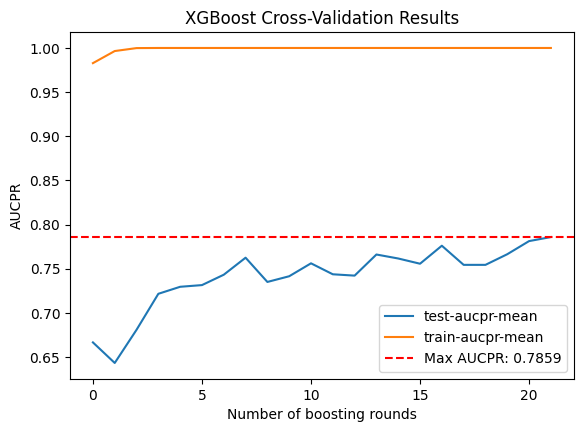

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming cv_results is the result from xgb.cv
cv_results_df = pd.DataFrame(cv_results)

# Display the results in a table
print(cv_results_df)

# Plot the training and testing mean AUCPR scores with specified figsize
ax = cv_results_df[['test-aucpr-mean', 'train-aucpr-mean']].plot(figsize=(6.5, 4.5))
plt.title('XGBoost Cross-Validation Results')
plt.xlabel('Number of boosting rounds')
plt.ylabel('AUCPR')

# Add a dotted line at the highest AUCPR
highest_aucpr = cv_results_df['test-aucpr-mean'].max()
plt.axhline(y=highest_aucpr, color='r', linestyle='--', label=f"Max AUCPR: {highest_aucpr:.4f}")
plt.legend()

# Show the plot
plt.show()

# Save the plot as PNG and PDF
ax.figure.savefig('XGBoost Cross Validation Results.png', bbox_inches='tight')
ax.figure.savefig('XGBoost Cross Validation Results.pdf', bbox_inches='tight')

In [ ]:
# Correct way to get best round from CV:
best_round = cv_results['test-aucpr-mean'].idxmax()
print("Best round from CV:", best_round)


Best round from CV: 21


So what happen here is, during cross valiidation, each boosting round adds a new tree that tries to fix the mistakes made by the previous model. basically With each new tree added, the model corrects more of its errors. So in this scenario, the model runs for 17 boosting rounds, where each round adds a corrected tree to the model. AT each boosting round, the model performs 15 more boosting rounds internally, if the mean AUCPR changes it continues adding more corrected trees. But if the mean AUCPR does not change for 15 internal boosting rounds (Since Early_stopping_rounds =15), the model stops at that boosting round witout adding any corrected trees. So in this scenario, after boosting round 17, model internally cheked for 15 more boosting rounds where no change for the mean AUCPR occurs. Therefore it stops at Boosting round 17 by giving the "Best round from CV: 17".

So now if you like you can re-run the final model again with the optimal number of n_estimators and remove early_stopping_rounds parameter.

"n_estimators=17: You already validated that 17 boosting rounds gave you the best AUCPR in cross-validation.

early_stopping_rounds is removed — it’s unnecessary when you already selected the best number of rounds.

In [ ]:
# To get the Optimal number of boosting rounds

import pandas as pd

# Assuming cv_results is the result from xgb.cv
cv_results_df = pd.DataFrame(cv_results)

# Set the threshold for minimum change to consider AUCPR as stabilized
threshold = 0.001

# Initialize optimal_round
optimal_round = None

# Find where the test AUCPR has stabilized over 10 consecutive rounds
for i in range(len(cv_results_df) - 10):
    diffs = cv_results_df['test-aucpr-mean'].diff().iloc[i:i+10]
    if all(abs(diff) < threshold for diff in diffs):
        optimal_round = i + 10  # +10 to point to the end of the 10-round window
        break

if optimal_round is None:
    print("AUCPR did not stabilize within the provided data.")
else:
    print(f"Optimal number of boosting rounds: {optimal_round}")


AUCPR did not stabilize within the provided data.


"AUCPR did not stabilize within the provided data" indicates that, based on the criteria set in the script, there wasn't a point in the provided cross-validation results where the Area Under the Precision-Recall Curve (AUCPR) remained relatively unchanged (or stabilized) for 10 consecutive boosting rounds.

Here's a breakdown of the criteria set in the script:

The script calculates the difference in AUCPR between each consecutive round of boosting using the diff() method.
It then checks a moving window of 10 consecutive rounds to see if the absolute difference in AUCPR for all these rounds is below a specified threshold (set to 0.001 in the script).
If such a 10-round window is found where the AUCPR doesn't change by more than the threshold, it's considered that the AUCPR has "stabilized," and the script identifies the optimal number of boosting rounds as the end of this window.
If no such window is found throughout the entire data, it means that the AUCPR kept changing (by more than the threshold) and never stabilized for 10 consecutive rounds.
In simpler terms, if you receive the message "AUCPR did not stabilize within the provided data," it means that the model's performance, as measured by AUCPR, was continuously changing and didn't remain relatively steady over any 10-round period in the cross-validation results you provided. This could suggest that the model might benefit from more boosting rounds, or you might need to adjust other hyperparameters or the threshold for stabilization.

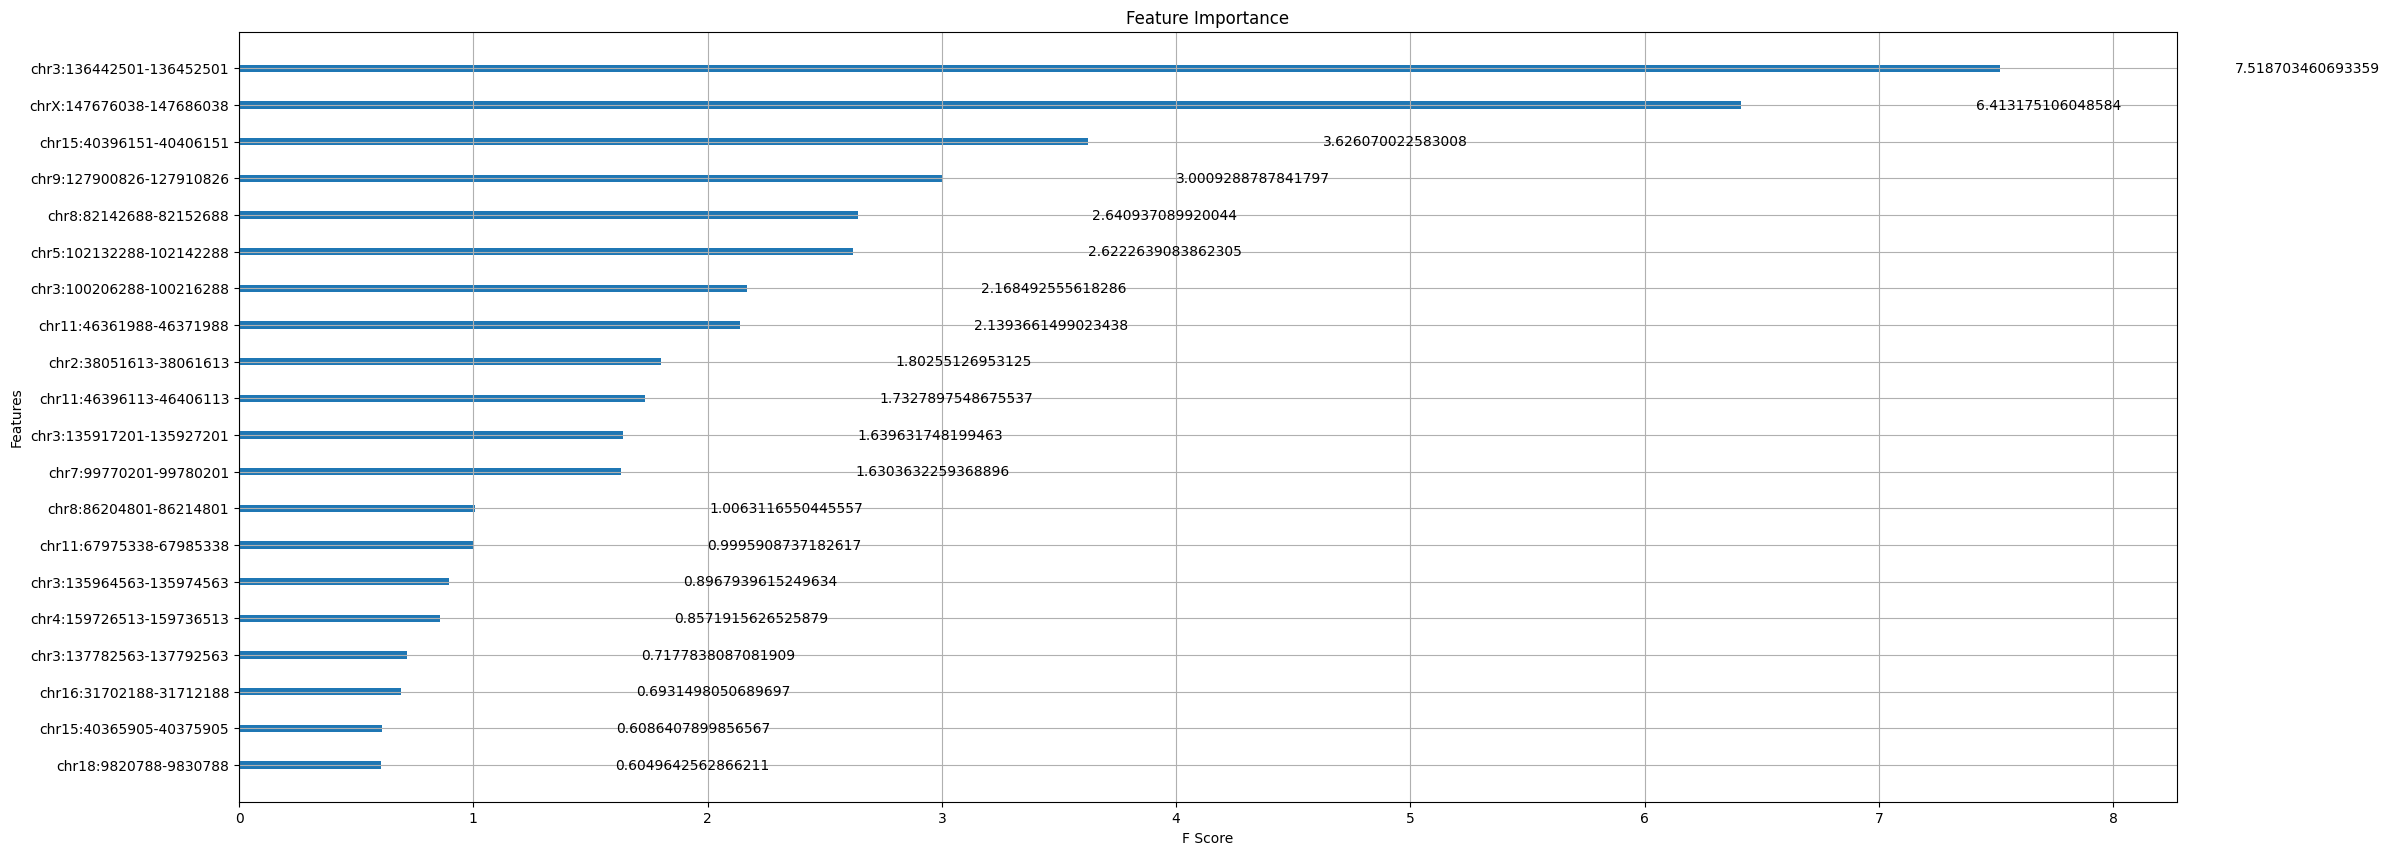

In [ ]:
# Extract feature importances from the model
importances = clf_xgb.get_booster().get_score(importance_type='gain')

# Sort features based on importance
sorted_features = sorted(importances.items(), key=lambda x: x[1], reverse=True)

# Save top 100 features to a txt file
with open('top_100_features.txt', 'w') as f:
    for feature, importance in sorted_features[:100]:
        f.write(f"{feature}: {importance}\n")

# Set the size of the plot
plt.rcParams["figure.figsize"] = (25, 10)

# Plot the top 20 most important features
plot_importance(clf_xgb, max_num_features=20, importance_type='gain')

# Add labels and a title
plt.title('Feature Importance')
plt.xlabel('F Score')
plt.ylabel('Features')

# Save the Feature Importance figure as a PDF
plt.savefig('xgb_feature_importance.pdf', dpi=300)

# Save the Feature Importance figure as a PNG
plt.savefig('xgb_feature_importance.png', dpi=300)

# Show the plot
plt.show()


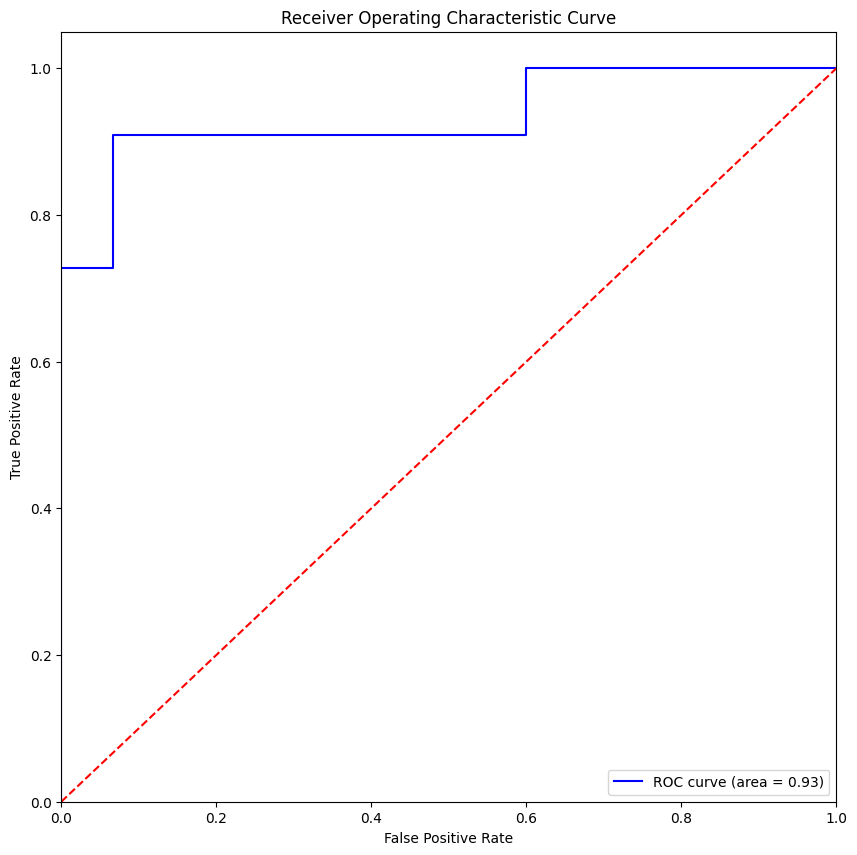

In [ ]:
from sklearn import metrics

# Ensure the model is a binary classifier
assert len(clf_xgb.classes_) == 2, "Model is not a binary classifier"

# Get probabilities for the positive class
y_preds = clf_xgb.predict_proba(X_test)[:, 1]

# Calculate ROC curve
fpr, tpr, _ = metrics.roc_curve(y_test, y_preds)

# Calculate AUC (Area under the ROC Curve )
auc_score = metrics.auc(fpr, tpr)

# Create figure and axis
plt.figure(figsize=(10, 10))

# Plot the ROC curve
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = {:.2f})'.format(auc_score))

# Plot the line of no discrimination
plt.plot([0, 1], [0, 1], color='red', linestyle='--')

# Set plot labels and title
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')

# Add legend
plt.legend(loc='lower right')

# Save the ROC curve as a PNG
plt.savefig('cfdna_xgb_ROC.png', dpi=300)

# Save the ROC curve as a PDF
plt.savefig('cfdna_xgb_ROC.pdf', dpi=300)

# # Show the plot
plt.show()

# # Close the plot
# plt.close()


In [ ]:
# #To generate the very 1st tree developed in XGBoost
# import xgboost as xgb
# from matplotlib import pyplot as plt

# # Get the booster from the XGBClassifier
# bst = clf_xgb.get_booster()

# # Print the feature importance for different importance types
# for importance_type in ('weight', 'gain', 'cover', 'total_gain', 'total_cover'):
#     print(f'{importance_type}:', bst.get_score(importance_type=importance_type))

# # Set parameters for the nodes in the graph
# node_params = {'shape': 'box',  # Make the nodes fancy
#                'style': 'filled, rounded',
#                'fillcolor': '#78cbe'}

# # Set parameters for the leaf nodes in the graph
# leaf_params = {'shape': 'box',  # Make the nodes fancy
#                'style': 'filled',
#                'fillcolor': '#e48038'}

# # To generate the very 1st tree developed in XGBoost (num_trees=0)
# graph = xgb.to_graphviz(clf_xgb, num_trees=0, size="10,10",
#                         condition_node_params=node_params,
#                         leaf_node_params=leaf_params)

# # Save the graph to a PDF file
# graph.format = 'pdf'
# graph.render('tree_graph')

# # Display the tree
# graph.view(cleanup=True)


In [ ]:
#To Save the BEST XGBoost tree at the best iteration.
# Assuming you've already trained your XGBoost model with early stopping and clf_xgb is your trained model

# Get the best iteration (subtracting 1 because it's 0-indexed)
#best_iteration = clf_xgb.best_ntree_limit - 1
best_iteration = clf_xgb.best_iteration


# Set parameters for the nodes in the graph
node_params = {'shape': 'box',  # Make the nodes fancy
               'style': 'filled, rounded',
               'fillcolor': '#78cbe'}

# Set parameters for the leaf nodes in the graph
leaf_params = {'shape': 'box',  # Make the nodes fancy
               'style': 'filled',
               'fillcolor': '#e48038'}

# Generate the graph for the best iteration
graph = xgb.to_graphviz(clf_xgb, num_trees=best_iteration, size="10,10",
                        condition_node_params=node_params,
                        leaf_node_params=leaf_params)

# Save the graph to a PDF file
graph.format = 'pdf'
graph.render('best_tree_graph')

# Display the tree
graph.view(cleanup=True)


'best_tree_graph.pdf'

Yes, the early_stopping_rounds parameter is used in conjunction with the eval_set parameter during training to monitor the performance on a validation set. When the performance (usually the error) on the validation set doesn't improve for early_stopping_rounds consecutive rounds, the training stops.

The clf_xgb.best_ntree_limit attribute then stores the number of trees (or boosting rounds) that should be used for predictions, which corresponds to the point where the model achieved the best performance on the validation set.

Here's a breakdown of how it works:

Training with early stopping: As the model trains, it will monitor the performance on the validation set specified by eval_set.
Stop condition: If the performance doesn't improve for early_stopping_rounds consecutive rounds, the training stops.
Best iteration: XGBoost then identifies the best iteration (tree) as the one that achieved the best performance on the validation set. The best_ntree_limit attribute is set to this iteration number (but note it's 1-indexed, so the actual tree index is best_ntree_limit - 1).
Predictions with the best model: When you use the model to make predictions later and specify ntree_limit=clf_xgb.best_ntree_limit, it will use only the trees up to the best iteration, effectively using the best model from training.

The process of choosing the "best tree" during training with early stopping in XGBoost is not based on feature importance metrics like "gain". Instead, it's based on the performance metric provided to the eval_metric parameter (or the default metric for the specific task if none is provided) on the validation set specified by eval_set.

Here's a brief explanation:

Performance Metric: During training, XGBoost evaluates the model's performance on the validation set using the metric specified by eval_metric. Common metrics include "rmse" for regression, "error" for classification, "logloss" for binary classification, and so on.
Early Stopping: If the performance on the validation set does not improve for early_stopping_rounds consecutive iterations, training is halted.
Best Tree Selection: The iteration (tree) that achieved the best score on the validation set (according to the eval_metric) is deemed the "best tree". This is stored in the best_ntree_limit attribute.
The "gain" metric you mentioned for feature importance is a measure of the average contribution brought by a feature to the model. It's calculated by taking each feature's contribution for each tree in the model, then averaging it out for each feature across all trees. It doesn't directly influence the selection of the "best tree" during training. The selection is based on the model's overall performance on the validation set, as measured by the eval_metric.

weight: {'chr1:943573-953573': 2.0, 'chr1:46994126-47004126': 2.0, 'chr11:46361988-46371988': 2.0, 'chr11:46396113-46406113': 1.0, 'chr11:67883988-67893988': 1.0, 'chr11:67975338-67985338': 1.0, 'chr12:110160063-110170063': 1.0, 'chr14:20994288-21004288': 6.0, 'chr15:40326389-40336389': 1.0, 'chr15:40365905-40375905': 1.0, 'chr15:40396151-40406151': 2.0, 'chr16:31702188-31712188': 1.0, 'chr18:9754001-9764001': 1.0, 'chr18:9820788-9830788': 2.0, 'chr18:11845188-11855188': 1.0, 'chr19:12840476-12850476': 1.0, 'chr2:37546751-37556751': 2.0, 'chr2:38051613-38061613': 3.0, 'chr2:38758338-38768338': 1.0, 'chr3:100206288-100216288': 2.0, 'chr3:122507651-122517651': 1.0, 'chr3:133189526-133199526': 1.0, 'chr3:135917201-135927201': 1.0, 'chr3:135964563-135974563': 1.0, 'chr3:136442501-136452501': 3.0, 'chr3:136727913-136737913': 1.0, 'chr3:137782563-137792563': 1.0, 'chr3:137828988-137838988': 1.0, 'chr4:81041876-81051876': 1.0, 'chr4:81282288-81292288': 1.0, 'chr4:81339288-81349288': 6.0, 'chr

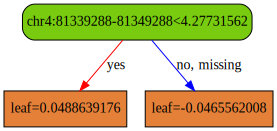

In [ ]:
#To print the BEST XGBoost tree

bst =clf_xgb.get_booster()
for importance_type in ('weight','gain','cover','total_gain','total_cover'):
  print('%s:'% importance_type, bst.get_score(importance_type=importance_type))

node_params = {'shape':'box', ##make the nodes fancy
               'style':'filled, rounded',
               'fillcolor':'#78cbe'}

leaf_params = {'shape':'box', ##make the nodes fancy
               'style':'filled',
               'fillcolor':'#e48038'}

xgb.to_graphviz(clf_xgb, num_trees=best_iteration,size="14,14",
                 condition_node_params=node_params,
                 leaf_node_params=leaf_params)


In XGBoost trees, the values at the leaves represent the raw scores or predictions that are given to instances that end up in that particular leaf.

Here's a deeper explanation:

Boosting Framework: XGBoost is a gradient boosting framework. This means that each tree is built to correct the mistakes of the sum of all previous trees. Each tree is not a standalone classifier or regressor but contributes a small amount to the final prediction.

Leaf Values: The values at the leaves, which can be positive or negative, are the adjustments or corrections the tree makes to the predictions. When an instance is classified by the ensemble, it traverses each tree and accumulates scores from the leaves of each tree it lands in. The sum of these scores across all trees gives the final raw score for the instance.

Classification or Regression:

Regression: The final raw score is the model's prediction.
Binary Classification: The raw score is transformed using the logistic function to produce a probability score, which can then be thresholded to produce a binary classification.
Multiclass Classification: XGBoost uses the "softmax" function to produce probabilities for each class.
Raw Score Intuition:

Positive values typically move the prediction in the positive class direction (or increase the prediction value for regression).
Negative values move the prediction in the negative class direction (or decrease the prediction value for regression).
For example, in binary classification, if the sum of the leaf values from all trees for a particular instance is positive, it's more likely that the instance will be classified as the positive class (after the logistic transformation). If the sum is negative, it's more likely to be classified as the negative class.

In summary, the values you see at the leaves of the XGBoost trees are the raw score adjustments or corrections that each tree contributes to the final prediction for instances that land in those leaves.

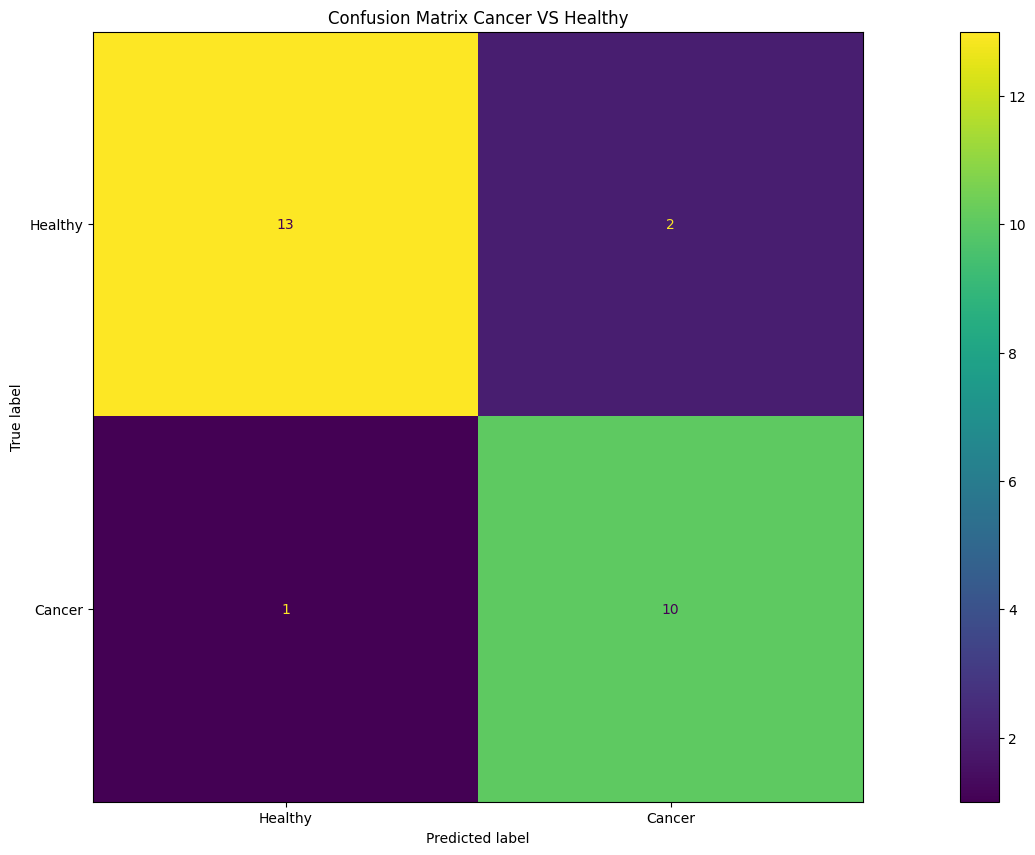

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Generate predictions
y_pred = clf_xgb.predict(X_test)

# Generate confusion matrix from predictions
disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=["Healthy","Cancer"])

# Add a title to the plot
plt.title('Confusion Matrix Cancer VS Healthy')

# Save the plot to a PDF file
plt.savefig('confusion_matrix.pdf', format='pdf', bbox_inches='tight')

# Show the plot
plt.show()

In [ ]:
# ##################################
# #For K-Fold Cross-Validation
# ##################################

# import xgboost as xgb
# from sklearn.model_selection import KFold

# # Get the parameters of your already trained model
# xgb_params = clf_xgb.get_params()

# # Convert objective type if necessary (XGBoost's train function and sklearn's XGBClassifier might use slightly different names for the same objectives)
# if xgb_params['objective'] == 'binary:logistic':
#     xgb_params['objective'] = 'binary:logistic'

# # Define the number of folds
# n_folds = 3
# kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)

# # Initialize lists to store train and test scores
# train_scores = []
# test_scores = []

# for train_idx, test_idx in kf.split(X):
#     # Split the data
#     X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
#     y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

#     # Convert the data into DMatrix format
#     dtrain = xgb.DMatrix(X_train, label=y_train)
#     dtest = xgb.DMatrix(X_test, label=y_test)

#     # Train the model using the parameters from the trained model
#     bst = xgb.train(xgb_params, dtrain, num_boost_round=1000, early_stopping_rounds=10,
#                     evals=[(dtest, 'eval')], verbose_eval=False)

#     # Get the best score
#     train_score = bst.best_score
#     # Assuming 'error' metric is used, convert it to accuracy
#     train_accuracy = 1 - train_score
#     train_scores.append(train_accuracy)

#     # Predict on the test set and calculate the accuracy
#     y_pred = bst.predict(dtest)
#     y_pred = [1 if p > 0.5 else 0 for p in y_pred]  # For binary classification
#     test_accuracy = (y_pred == y_test).mean()
#     test_scores.append(test_accuracy)

#     print(f"Fold {len(train_scores)} - Train Accuracy: {train_accuracy}, Test Accuracy: {test_accuracy}")

# print(f"Mean Train Accuracy: {sum(train_scores)/n_folds}")
# print(f"Mean Test Accuracy: {sum(test_scores)/n_folds}")


CV (Cross-Validation)

Concept: Cross-validation is a statistical method used to estimate the performance of machine learning models. It divides the dataset into multiple subsets (or "folds"). For each fold, the model is trained on the combination of the other folds and validated on the current fold. This process is repeated until each fold has been used as the validation set. The performance measures from each fold are typically averaged to provide an overall assessment of the model.

In Your Code: The function xgb.cv from the XGBoost library is an implementation of cross-validation specifically tailored for XGBoost models. It automates the process of splitting the dataset, training the model on subsets, and collecting performance metrics.

kf (KFold)

Concept: KFold is a specific method of cross-validation where the dataset is divided into k subsets (or "folds"). In each iteration, one of these folds is used as the validation set while the remaining k−1 folds are used for training.
In Your Code: kf is an instance of the KFold class from the sklearn.model_selection module. It provides indices to split data into train/test sets, allowing for manual control over the cross-validation process. This can be useful when you want more flexibility or need to perform operations that aren't directly supported by the automated cross-validation functions.
In summary, while "CV" refers to the general concept of cross-validation, "kf" in your code refers to a specific instance of the KFold class used to implement k-fold cross-validation manually. The xgb.cv function provides an automated way to perform cross-validation for XGBoost models, while using KFold gives you a more hands-on and flexible approach to the process.

In [ ]:
# #To get get Feature Interactions and Dependencies
# !pip install shap
# import shap
# import matplotlib.pyplot as plt

# # Create a SHAP explainer object and calculate SHAP values for the training set
# explainer = shap.TreeExplainer(clf_xgb)
# shap_values = explainer.shap_values(X_train)

# # Set up the matplotlib figure for the summary plot
# plt.figure(figsize=(10, 6))
# shap.summary_plot(shap_values, X_train, show=False)
# plt.title("SHAP Summary Plot for Model Features")
# plt.tight_layout()

# # Save the figure to a PDF
# pdf_output_summary = "SHAP_summary_plot.pdf"
# plt.savefig(pdf_output_summary, format='pdf')

# # Display the SHAP summary plot in the notebook
# plt.show()

SHAP values for top 20 features saved as: SHAP_values_top20_features.csv


/tmp/ipython-input-193-2281025496.py:35: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, X_train, show=False)


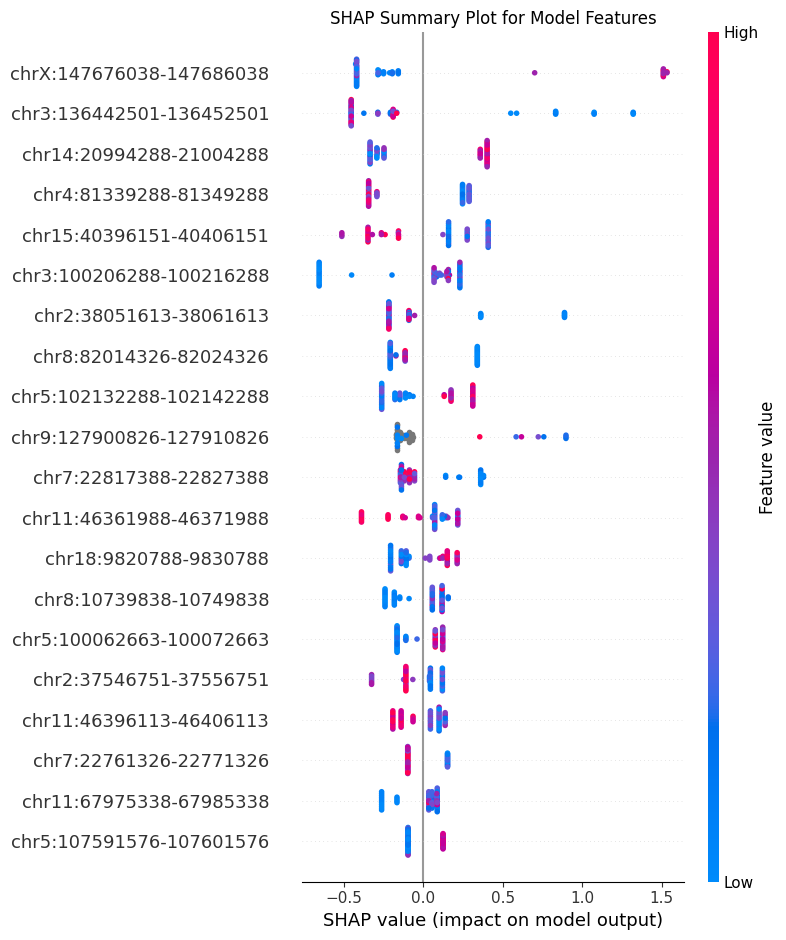

In [ ]:
# Install SHAP if not installed
!pip install shap

import shap
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Create a SHAP explainer object and calculate SHAP values for the training set
explainer = shap.TreeExplainer(clf_xgb)
shap_values = explainer.shap_values(X_train)

# Convert SHAP values to a Pandas DataFrame
shap_df = pd.DataFrame(shap_values, columns=X_train.columns)

# =================== Save SHAP values for ALL features (Commented Out) ===================
# shap_csv_output_all = "SHAP_values_all_features.csv"
# shap_df.to_csv(shap_csv_output_all, index=False)
# print(f"SHAP values for all features saved as: {shap_csv_output_all}")

# Identify the top 20 most important features based on mean absolute SHAP values
shap_importance = np.abs(shap_df).mean().sort_values(ascending=False)
top_20_features = shap_importance.index[:20]

# Filter only the top 20 features
shap_df_top20 = shap_df[top_20_features]

# Save SHAP values for the top 20 features to a CSV file
shap_csv_output_top20 = "SHAP_values_top20_features.csv"
shap_df_top20.to_csv(shap_csv_output_top20, index=False)
print(f"SHAP values for top 20 features saved as: {shap_csv_output_top20}")

# Set up the matplotlib figure for the summary plot
plt.figure(figsize=(10, 6))
shap.summary_plot(shap_values, X_train, show=False)
plt.title("SHAP Summary Plot for Model Features")
plt.tight_layout()

# Save the figure to a PDF
pdf_output_summary = "SHAP_summary_plot.pdf"
plt.savefig(pdf_output_summary, format='pdf')

# Display the SHAP summary plot in the notebook
plt.show()


SHAP values tell you why each prediction was made.
XGBoost Gain Score tells you what features are important overall in the model.
Ideally, use both together for deeper insights.

Feature importance and SHAP values are both tools used to interpret and understand machine learning models, but they provide different perspectives and are based on different principles. Let's break down their differences and relationships:

1. Feature Importance (Gain in XGBoost):
Definition: Feature importance is a metric that quantifies the contribution of a particular feature to the predictions of a machine learning model. In the context of tree-based models like XGBoost, the importance of a feature can be measured in several ways, including:
Weight: The number of times a feature appears in trees across all iterations.
Gain: The average gain (or improvement in accuracy) brought by a feature when it is used in trees. This is the metric you mentioned.
Cover: The average coverage of a feature when it is used in trees.
Pros and Cons:
Pros: Simple and fast to compute; provides a quick overview of which features the model considers most influential.
Cons: Doesn't capture interaction effects or the directionality of a feature's impact. It's a global measure and doesn't provide instance-level interpretations.
2. SHAP Values:
Definition: SHAP values, derived from cooperative game theory, provide a way to fairly allocate a prediction's deviation from the average prediction to each feature. For any specific prediction, the sum of the SHAP values for all features plus the base value (average model output over the dataset) is equal to the prediction for that instance.

Pros and Cons:

Pros: Provides both global (overall importance) and local (per-instance) explanations. Captures interaction effects and directionality of feature impact. Grounded in theory, ensuring consistent and fairly distributed feature attributions.
Cons: Computationally more intensive than traditional feature importance, especially for complex models.
Relationship:
Consistency: One of the main motivations behind SHAP values is the property of consistency. If we increase the importance of a feature (by any measure), it shouldn't decrease the attributed importance of that feature, as can sometimes happen with traditional feature importance metrics.

Global vs. Local: Traditional feature importance metrics (like Gain) provide a global perspective, showing the overall importance of features for the entire dataset. SHAP values, on the other hand, can provide both global (average SHAP value of a feature across all instances) and local (SHAP value for a specific instance) interpretations.

Interactions: SHAP values can capture interaction effects between features, which traditional feature importance metrics might miss. If a feature has a significant impact on predictions only when considered in combination with another feature, this might not be evident from the Gain but will be captured by SHAP values.

Summary Plot: The SHAP summary plot can resemble a feature importance plot when ranked by the absolute average SHAP value. However, it also provides color-coded information about feature values and spreads of SHAP values, making it more informative than a simple feature importance plot.

In summary, while Gain-based feature importance provides a quick overview of influential features, SHAP values offer a more nuanced, detailed, and theoretically grounded interpretation, capturing both main effects and interactions. When interpreting complex models, especially for critical applications, it's beneficial to consider both traditional feature importance and SHAP values to get a comprehensive understanding of the model's behavior.

In [ ]:
# # You can also create a SHAP dependence plot to show the effect of a single feature across the whole dataset
# # Replace 'FeatureName' with the name of the feature you're interested in
# # shap.dependence_plot('FeatureName', shap_values, X_train)

# # shap.dependence_plot('chr4:146014250-146024250', shap_values, X_train)

# shap.dependence_plot('chr15:99315200-99325200', shap_values, X_train)


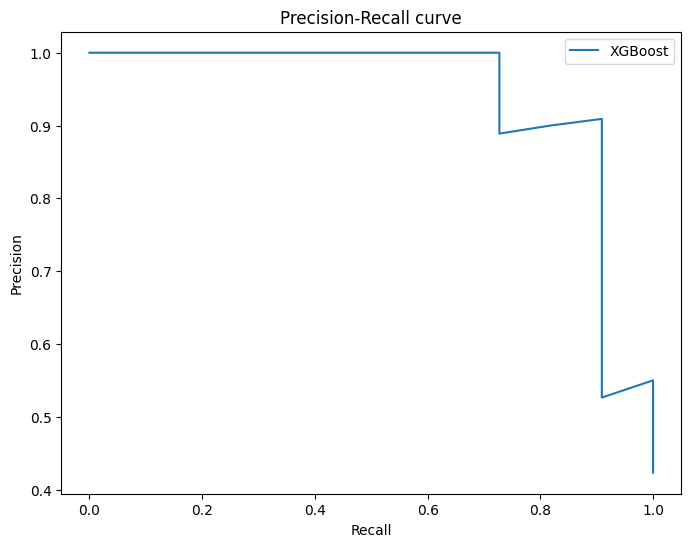

In [ ]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

y_scores = clf_xgb.predict_proba(X_test)[:, 1]


# Compute the precision and recall
precision, recall, _ = precision_recall_curve(y_test, y_scores)

# Create the plot
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label='XGBoost')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve')
plt.legend(loc='best')
plt.show()



In [ ]:
# Zip the directory where your files are saved and download all at once
!zip -r output_files.zip /content/
from google.colab import files
files.download("output_files.zip")

updating: content/ (stored 0%)
updating: content/.config/ (stored 0%)
updating: content/.config/default_configs.db (deflated 98%)
updating: content/.config/logs/ (stored 0%)
updating: content/.config/logs/2025.07.16/ (stored 0%)
updating: content/.config/logs/2025.07.16/13.47.19.800388.log (deflated 58%)
updating: content/.config/logs/2025.07.16/13.47.49.863054.log (deflated 56%)
updating: content/.config/logs/2025.07.16/13.47.36.852800.log (deflated 57%)
updating: content/.config/logs/2025.07.16/13.46.49.213464.log (deflated 92%)
updating: content/.config/logs/2025.07.16/13.47.31.634017.log (deflated 86%)
updating: content/.config/logs/2025.07.16/13.47.48.882615.log (deflated 57%)
updating: content/.config/configurations/ (stored 0%)
updating: content/.config/configurations/config_default (deflated 15%)
updating: content/.config/.last_survey_prompt.yaml (stored 0%)
updating: content/.config/active_config (stored 0%)
updating: content/.config/hidden_gcloud_config_universe_descriptor_da

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd
import numpy as np
import xgboost as xgb
import sklearn
import matplotlib
import shap

packages = {
    'pandas': pd.__version__,
    'numpy': np.__version__,
    'xgboost': xgb.__version__,
    'scikit-learn': sklearn.__version__,
    'matplotlib': matplotlib.__version__,
    'shap': shap.__version__
}

print(packages)


{'pandas': '2.2.2', 'numpy': '1.26.4', 'xgboost': '2.0.3', 'scikit-learn': '1.3.2', 'matplotlib': '3.10.0', 'shap': '0.48.0'}


In [ ]:
# #To list all the attributes of your clf_xgb object
dir(clf_xgb)

['_Booster',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__sklearn_clone__',
 '__sklearn_is_fitted__',
 '__slotnames__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_build_request_for_signature',
 '_can_use_inplace_predict',
 '_check_feature_names',
 '_check_n_features',
 '_configure_fit',
 '_create_dmatrix',
 '_estimator_type',
 '_get_default_requests',
 '_get_iteration_range',
 '_get_metadata_request',
 '_get_param_names',
 '_get_tags',
 '_get_type',
 '_load_model_attributes',
 '_more_tags',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_set_evaluation_result',
 '_validate_data',
 '_validate_params',
 'apply',
 'base_score',
 'best_iteration',
 'best_scor